## FC for Widespread Pain Subjects
#### Input: *stc.mat
####  Output: con, visualization

In [1]:
import os
from pathlib import Path
import sys
import mne 
import numpy as np
from mne.datasets import fetch_fsaverage
fs_dir = fetch_fsaverage(verbose=True)
subject = "fsaverage"
subjects_dir = os.path.dirname(fs_dir)
sys.path.append("/home/wanglab/Documents/George Kenefati/Code/eeg_toolkit/")
from eeg_toolkit import preprocess, utils
import eeg_toolkit.functional_connectivity as fc

0 files missing from root.txt in /home/wanglab/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /home/wanglab/mne_data/MNE-fsaverage-data/fsaverage
0 files missing from root.txt in /home/wanglab/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /home/wanglab/mne_data/MNE-fsaverage-data/fsaverage


### Paths

In [2]:
# sl_method = input("Source Localization Method (1- MNE or 2- dSPM): ")
# sl_method = 'MNE' if sl_method == '1' else 'dSPM'
# sl_method = 'dSPM'
sl_method = 'MNE'

In [3]:
# Settings
times_tup, time_win_path = preprocess.get_time_window(5)

# data paths
data_dir = Path("../../Data")
processed_data_path = data_dir / "Processed Data"
stc_path = data_dir / f"Source Time Courses ({sl_method})"
EO_resting_data_path = stc_path / "Eyes Open"
EC_resting_data_path = stc_path / "Eyes Closed"
zscored_epochs_data_path = stc_path / "zscored_Epochs" / time_win_path

# save paths
subset = "Widespread_Pain"
fc_path = data_dir / f"Functional Connectivity ({sl_method})"
fc_subset_path = fc_path / subset
save_path = fc_subset_path

os.makedirs(save_path, exist_ok=True)

[-2.5,0.0,2.5]


### Get subset of subjects with and without widespread pain

In [4]:
# viable subjects
sub_ids = utils.import_subs(data_dir, "sub_ids.txt")
sub_ids = sub_ids[7:]  # select only 64ch subs and turn into set
sub_ids_CP = [el for el in sub_ids if el.startswith('0')]
sub_ids_HC = [el for el in sub_ids if el.startswith('C')]

# CP Subs with widespread pain
widespread_pain_CP = [
    '055',
    '052',
    '046',
    '039',
    '036',
    '031',
    '022',
    '045',
    '040',
    '034',
    '032',
    '024',
    '018'
]

# Sort and limit CP subs to only those with widespread pain
widespread_pain_CP.sort()
sub_ids_CP_WSP = widespread_pain_CP

# Exclude HEALTHY subjects with widespread pain
widespread_pain_HC = ['C1.','C23']
sub_ids_HC = [sub for sub in sub_ids_HC if sub not in widespread_pain_HC]

# Combine selected CP and HC subjects
sub_ids = sub_ids_CP_WSP + sub_ids_HC

# These subjects have no keypresses and thus no resting timestamps, but they do have epoched data
NO_KEYPRESS = ['045', 'C1.', 'C5.', 'C8.', 'C20', 'C21', 'C22']
sub_ids = [sub for sub in sub_ids if sub not in NO_KEYPRESS]
sub_ids_CP = [sub for sub in sub_ids_CP if sub not in NO_KEYPRESS]

In [5]:
sub_ids_CP_WSP = [el for el in sub_ids if el.startswith('0')]
sub_ids_HC = [el for el in sub_ids if el.startswith('C')]

print(f"Chronics: {len(sub_ids_CP_WSP)}")
print([el for el in sub_ids_CP_WSP])
print(f"Controls: {len(sub_ids_HC)}")
print([el for el in sub_ids_HC])
print(f"Total: {len(sub_ids)}")

Chronics: 12
['018', '022', '024', '031', '032', '034', '036', '039', '040', '046', '052', '055']
Controls: 19
['C2.', 'C3.', 'C6.', 'C7.', 'C9.', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C24', 'C25', 'C26', 'C27']
Total: 31


In [6]:
# Chronic Pain Subs without widespread pain
sub_ids = utils.import_subs(data_dir, "sub_ids.txt")
sub_ids = sub_ids[7:]  # select only 64ch subs and turn into set
sub_ids_CP_No_WSP = [el for el in sub_ids if el.startswith('0')]

# Exclude temporarily missing keypresses
sub_ids_CP_No_WSP = [sub for sub in sub_ids_CP_No_WSP if sub not in NO_KEYPRESS]

# Final list of CP subs with localized pain
sub_ids_CP_No_WSP = [sub for sub in sub_ids_CP_No_WSP if sub not in sub_ids_CP_WSP]

# Exclude subjects with low trial count
# TODO: figure out how to skip
# 055 has 4 Hand 256mN trials (WSP)
# sub_ids_CP_WSP.remove('055') 
# 036 has 6; 037 has 6, 044 has 5, 056 has 5, 058 has 4 (Localized pain)
# sub_ids_CP_No_WSP.remove(['036', '037', '044', '056', '058'])

print(f"Chronics (all): {len(sub_ids_CP)}")
print([el for el in sub_ids_CP])
print(f"Chronics with widespread pain: {len(sub_ids_CP_WSP)}")
print([el for el in sub_ids_CP_WSP])
print(f"Chronics with localized pain: {len(sub_ids_CP_No_WSP)}")
print([sub for sub in sub_ids_CP_No_WSP])
print(f"Controls: {len(sub_ids_HC)}")
print([el for el in sub_ids_HC])
print(f"Total: {len(sub_ids)}")


Chronics (all): 35
['018', '020', '021', '022', '023', '024', '027', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '046', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058']
Chronics with widespread pain: 12
['018', '022', '024', '031', '032', '034', '036', '039', '040', '046', '052', '055']
Chronics with localized pain: 23
['020', '021', '023', '027', '029', '030', '033', '035', '037', '038', '041', '042', '043', '044', '048', '049', '050', '051', '053', '054', '056', '057', '058']
Controls: 19
['C2.', 'C3.', 'C6.', 'C7.', 'C9.', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C24', 'C25', 'C26', 'C27']
Total: 61


### Settings for conditions/bands/methods

In [7]:
# Settings
sfreq = 400  # Hz
tmin, tmax = 0.0, 1.25  # exclude the baseline period for connectivity estimation

# Use canonical bands or narrower bands
narrow_bands = True    

# Choose which connectivity estimates to run. "amplitude", "phase", or "both"
method_choice = "both"

# Include intermediate stimulus?
include_LS = False

# Save group data?
save_group_data_flag = False

# Load group data instead
load_group_data_flag = False if save_group_data_flag else True

# Evoked only or include resting too?
include_resting = False

### Define ROIs, frequency bands, conditions, and methods for FC

In [8]:
####################################################################
# REGIONS OF INTEREST
roi_names = [  # Left
    "rostralanteriorcingulate-lh",  # Left Rostral ACC
    "caudalanteriorcingulate-lh",  # Left Caudal ACC
    "postcentral-lh",  # Left S1,
    "insula-lh",
    "superiorfrontal-lh",  # Left Insula, Left DL-PFC,
    "medialorbitofrontal-lh",  # Left Medial-OFC
    # Right
    "rostralanteriorcingulate-rh",  # Right Rostral ACC
    "caudalanteriorcingulate-rh",  # Right Caudal ACC
    "postcentral-rh",  # , Right S1
    "insula-rh",
    "superiorfrontal-rh",  # Right Insula, Right DL-PFC
    "medialorbitofrontal-rh",
]  # Right Medial-OFC

# Write out ROI names as acronyms
roi_acronyms = ["rACC-lh", "ACC-lh", "S1-lh", "insula-lh", "dlPFC-lh", "mOFC-lh",
                "rACC-rh", "ACC-rh", "S1-rh", "insula-rh", "dlPFC-rh", "mOFC-rh"]


####################################################################
# BANDS OF INTEREST
if not narrow_bands:
    Freq_Bands = {
        # 'delta': [0, 4],
        "theta": [4.0, 8.0],
        "alpha": [8.0, 13.0],
        "beta": [13.0, 30.0],
        "low-gamma": [30.0, 58.5],
        # # "notch": [58.5, 61.5],
        "high-gamma": [61.5, 100.0],
    }
else:
    Freq_Bands = { # Narrower bands and overlaps
        # 'delta': [0, 4],
        "theta": [4.0, 8.0],
        "low-alpha": [6.0, 12.0],
        "high-alpha": [10.0, 15.0],
        "low-beta": [12.0, 22.0],
        "high-beta": [20.0, 32.0],
        "low-gamma-i": [28.0, 46.0],
        "low-gamma-ii": [44.0, 58.5],
        # # "notch": [58.5, 61.5],
        "high-gamma-i": [61.5, 82.0],
        "high-gamma-ii": [80.0, 100.0],
    }
band_names = [band for band in Freq_Bands]

####################################################################
# CONNECTIVITY METHODS
if method_choice == "phase":
    con_methods = ["wpli2_debiased"]
elif method_choice == "amplitude":
    con_methods = [ "aec_pairwise",
                   "aec_symmetric",
                   ]
elif method_choice == "both":
    con_methods = [
    "wpli2_debiased",
    #   "dpli",
    # "aec_pairwise",
    "aec_symmetric", # keep only symmetric for now
    ]
    
####################################################################
# CONDITIONS
conditions = (
    [
        "Hand 32 mN",
        "Hand 128 mN",
        "Hand 256 mN",
        "Back 32 mN",
        "Back 128 mN",
        "Back 256 mN",
        "Eyes Open",
        "Eyes Closed",
    ]
    if include_LS
    else [
        # "Hand 32 mN",
        # 'Hand LS',
        "Hand 256 mN",
        # "Back 32 mN",
        # 'Back LS',
        # "Back 256 mN",
        "Eyes Open", # TODO: uncomment
        # "Eyes Closed",
    ]
)

# Choose to exclude resting state data
conditions = conditions if include_resting else [
    c for c in conditions if "Eyes" not in c
]

####################################################################
# CONDITION DICTIONARY
condition_dict = {
        "Hand 32 mN": 0,
        'Hand LS': 1,
        "Hand 256 mN": 2,
        "Back 32 mN": 3,
        'Back LS': 4,
        "Back 256 mN": 5,
        "Eyes Open": 6,
        "Eyes Closed": 7,
}

####################################################################
# GROUP NAMES
groups=['Chronic Pain with Widespread Pain','Chronic Pain', 'Healthy Control']

### Compute functional connectivity for each subject in each group

In [9]:
# CLBP with WSP
if not load_group_data_flag:
    sub_con_CP_WSP = {}
    for sub_id in sub_ids_CP_WSP:
        print(sub_id)
        sub_avg_cons = fc.compute_sub_avg_con(
            sub_id,
            "Chronic Pain w/ WSP",
            processed_data_path,
            zscored_epochs_data_path,
            EO_resting_data_path,
            EC_resting_data_path,
            con_methods,
            conditions,
            condition_dict,
            roi_names,
            Freq_Bands,
            tmin,
            tmax,
            sfreq,
            include_LS=include_LS,
        )
        sub_con_CP_WSP[sub_id] = sub_avg_cons
        
    utils.clear_display()

In [10]:
# Healthy Control group
if not load_group_data_flag:
    sub_con_HC = {}
    for sub_id in sub_ids_HC:
        print(sub_id)
        sub_avg_cons = fc.compute_sub_avg_con(
            sub_id,
            "Healthy Control",
            processed_data_path,
            zscored_epochs_data_path,
            EO_resting_data_path,
            EC_resting_data_path,
            con_methods,
            conditions,
            condition_dict,
            roi_names,
            Freq_Bands,
            tmin,
            tmax,
            sfreq,
            include_LS=include_LS,
        )
        sub_con_HC[sub_id] = sub_avg_cons
    utils.clear_display()

In [11]:
# CLBP without WSP
if not load_group_data_flag:
    sub_con_CP_No_WSP = {}
    for sub_id in sub_ids_CP_No_WSP:
        print(sub_id)
        sub_avg_cons = fc.compute_sub_avg_con(
            sub_id,
            "Chronic Pain w/ Localized Pain",
            processed_data_path,
            zscored_epochs_data_path,
            EO_resting_data_path,
            EC_resting_data_path,
            con_methods,
            conditions,
            condition_dict,
            roi_names,
            Freq_Bands,
            tmin,
            tmax,
            sfreq,
            include_LS=include_LS,
        )
        sub_con_CP_No_WSP[sub_id] = sub_avg_cons
        
    utils.clear_display()

In [12]:
if not load_group_data_flag:
    # Stack the connectivity of all subjects in each group
    group_con_CP_WSP = fc.compute_group_con(sub_con_CP_WSP, conditions, con_methods, band_names)
    group_con_HC = fc.compute_group_con(sub_con_HC, conditions, con_methods, band_names)
    group_con_CP_No_WSP = fc.compute_group_con(sub_con_CP_No_WSP, conditions, con_methods, band_names)
else:
    group_con_CP_WSP = utils.unpickle_data(save_path, f"group_con_{subset}_CP_WSP.pkl")
    group_con_HC = utils.unpickle_data(save_path, f"group_con_{subset}_HC.pkl")
    group_con_CP_No_WSP = utils.unpickle_data(save_path, f"group_con_{subset}_CP_No_WSP.pkl")

In [13]:
if save_group_data_flag:
    # Save/checkpoint as pickle
    utils.pickle_data(save_path, f"sub_con_{subset}_CP_WSP.pkl", sub_con_CP_WSP)
    utils.pickle_data(save_path, f"group_con_{subset}_CP_WSP.pkl", group_con_CP_WSP)

    utils.pickle_data(save_path, f"sub_con_{subset}_CP_No_WSP.pkl", sub_con_CP_No_WSP)
    utils.pickle_data(save_path, f"group_con_{subset}_CP_No_WSP.pkl", group_con_CP_No_WSP)
    
    utils.pickle_data(save_path, f"sub_con_{subset}_HC.pkl", sub_con_HC)
    utils.pickle_data(save_path, f"group_con_{subset}_HC.pkl", group_con_HC)

### Plot settings

### Plot and compute satistics to assess statistical differences 

In [14]:
# Highlight p-values with red box automatically
highlight_pvals=False

# Make any non-significant squares white
show_only_significant=True

# Set a minimum value for the functional connectivity (for sub zero values)
min_fc_val=None

# Set title automatically
set_title=True

# Show values in the matrix quadrants
show_fc_vals=True

# Round negative values to zero
round_neg_vals=True

# Plot 3D brain visualization (for AEC only)
plot_brain=False

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - theta
Num epochs: 120 vs. 212
+-----------------------+---------+----------------+----------------+
|       ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-----------------------+---------+----------------+----------------+
|   S1-rh <-> ACC-lh    |  0.02   |  0.013 ± 0.01  | 0.138 ± 0.046  |
| dlPFC-rh <-> dlPFC-lh |  0.01   | 0.012 ± 0.012  |  0.1 ± 0.029   |
|  dlPFC-rh <-> S1-rh   |  0.005  | 0.157 ± 0.054  | 0.004 ± 0.003  |
+-----------------------+---------+----------------+----------------+


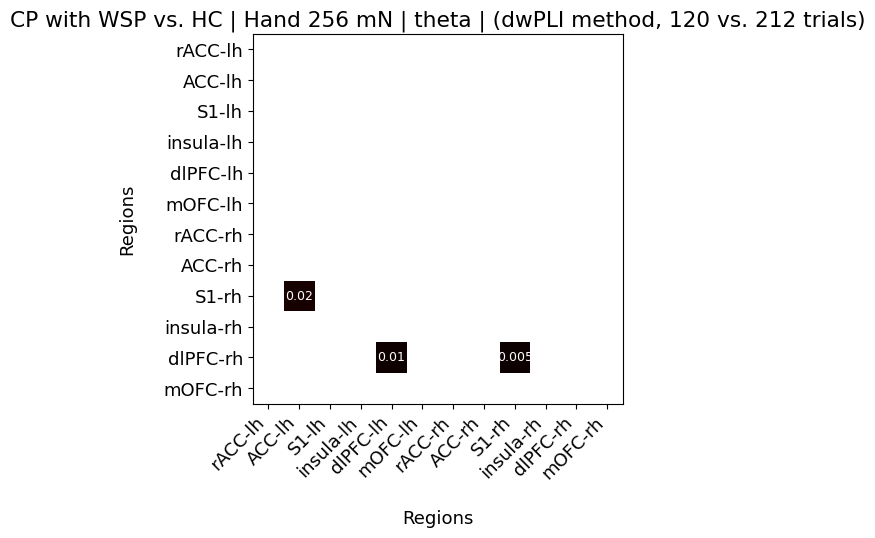

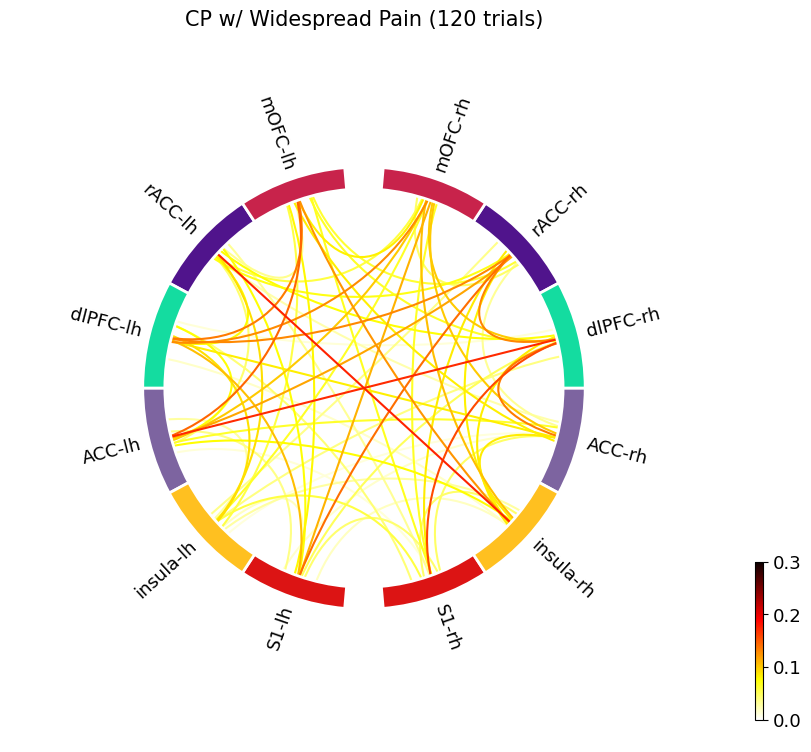

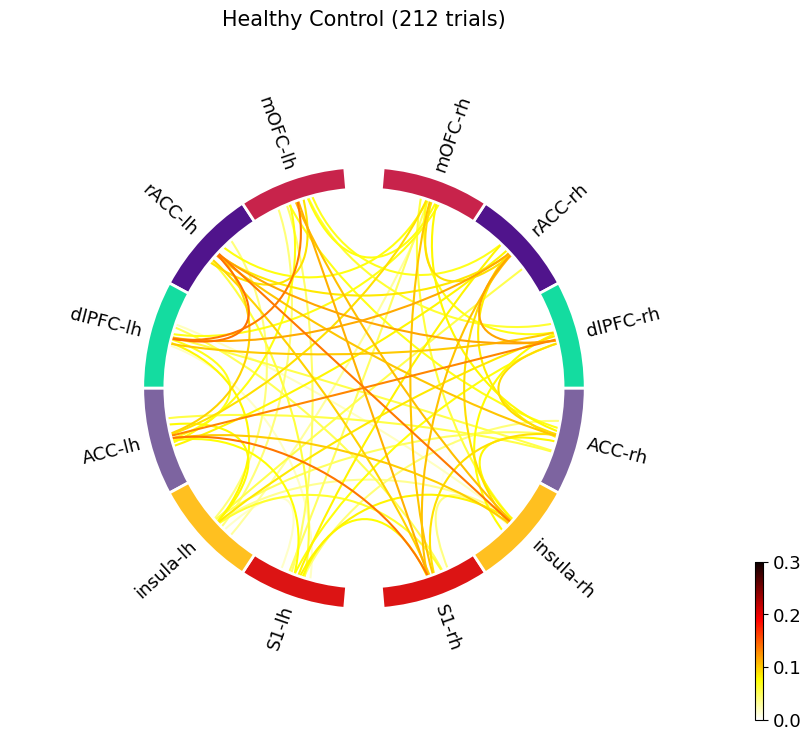

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - low-alpha
Num epochs: 120 vs. 212
+--------------------+---------+----------------+----------------+
|      ROI Pair      | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+--------------------+---------+----------------+----------------+
| ACC-rh <-> rACC-lh |  0.032  | 0.027 ± 0.027  | 0.064 ± 0.023  |
|  S1-rh <-> ACC-lh  |  0.02   | 0.005 ± 0.005  | 0.065 ± 0.021  |
| S1-rh <-> mOFC-lh  |  0.009  | 0.001 ± 0.001  | 0.086 ± 0.033  |
| dlPFC-rh <-> S1-rh |  0.036  | 0.148 ± 0.058  | 0.031 ± 0.018  |
+--------------------+---------+----------------+----------------+


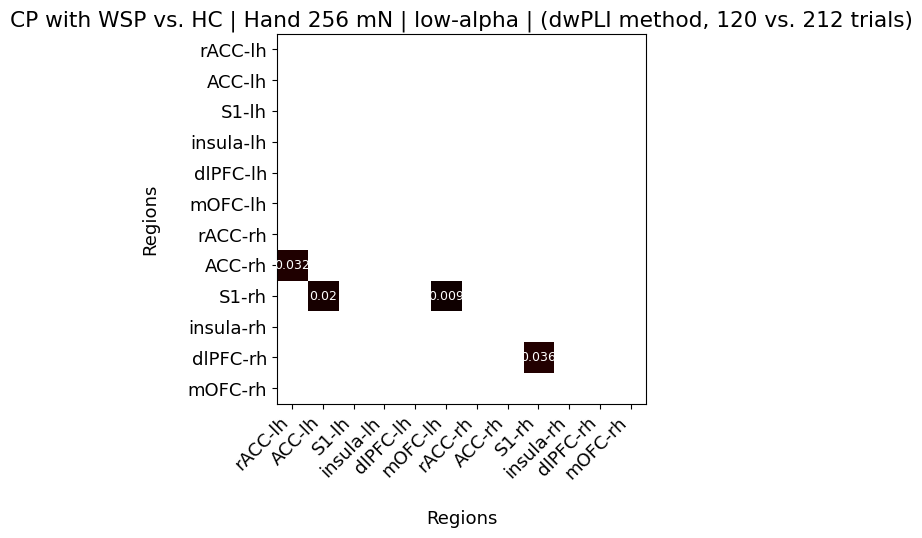

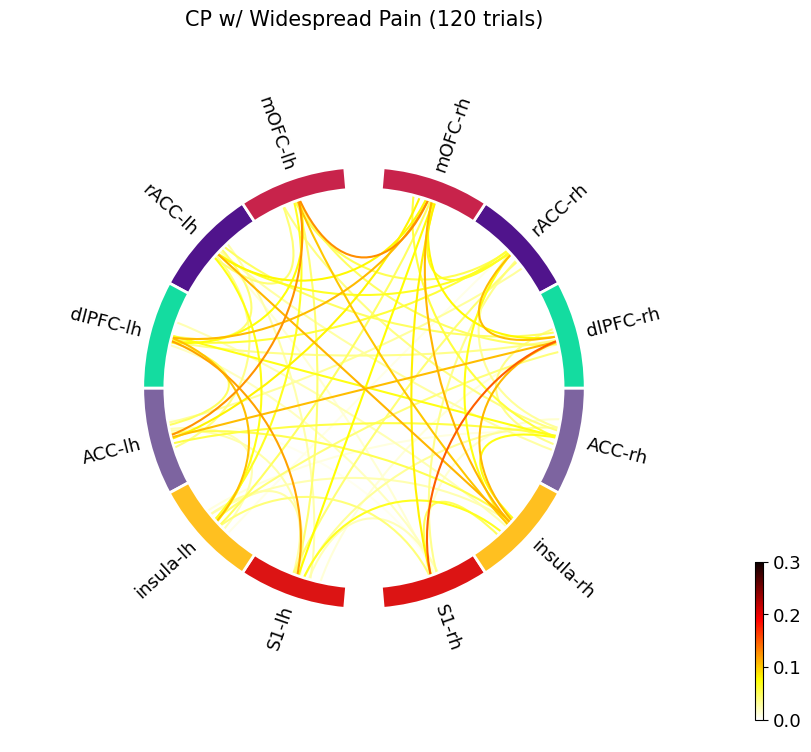

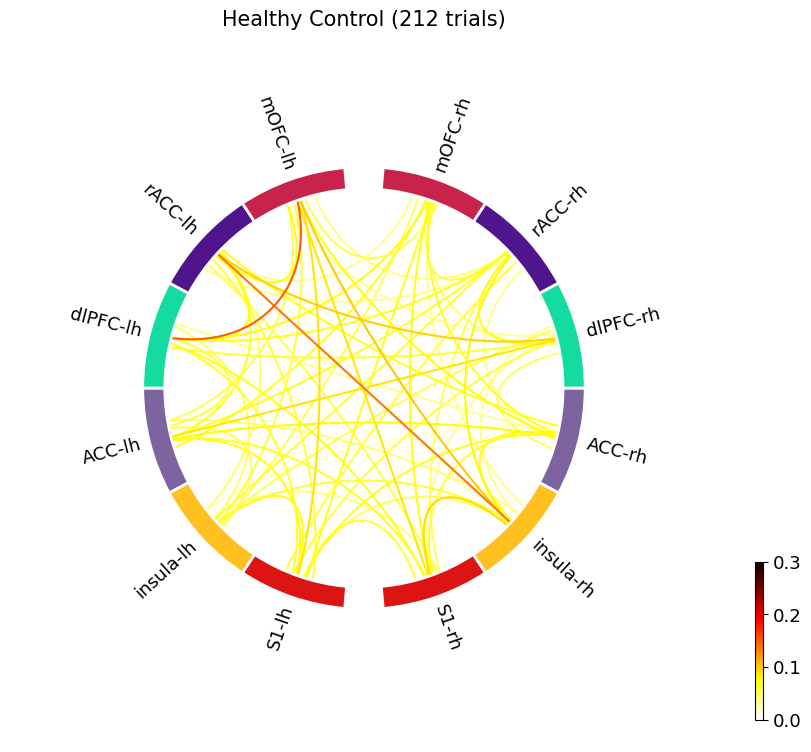

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - high-alpha
Num epochs: 120 vs. 212
+-------------------------+---------+----------------+----------------+
|        ROI Pair         | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-------------------------+---------+----------------+----------------+
|   ACC-lh <-> rACC-lh    |  0.006  | 0.005 ± 0.003  | 0.142 ± 0.044  |
|   insula-lh <-> S1-lh   |   0.0   |   0.0 ± 0.0    | 0.092 ± 0.021  |
|   ACC-rh <-> rACC-lh    |  0.012  |   0.0 ± 0.0    | 0.104 ± 0.042  |
|   ACC-rh <-> mOFC-lh    |  0.037  |   0.0 ± 0.0    |  0.11 ± 0.048  |
| insula-rh <-> insula-lh |  0.045  | 0.044 ± 0.034  |  0.097 ± 0.03  |
+-------------------------+---------+----------------+----------------+


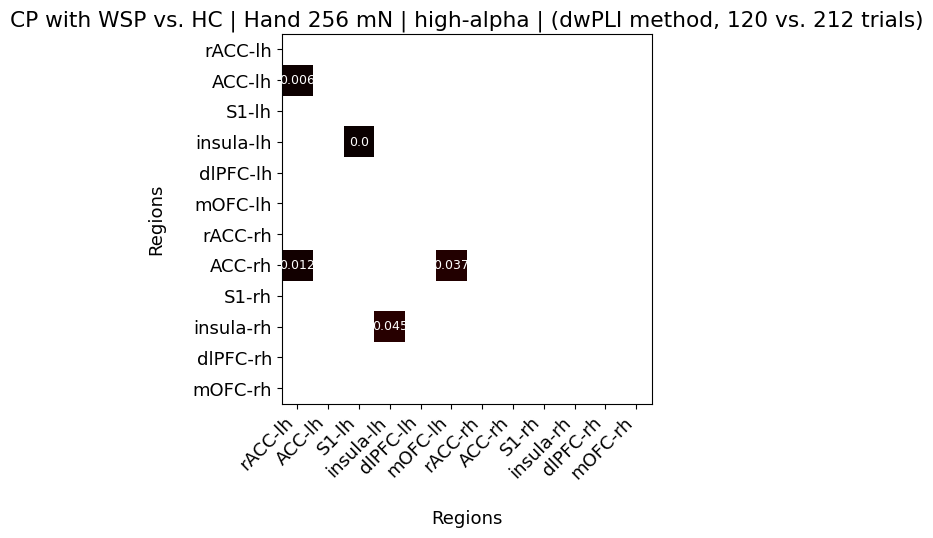

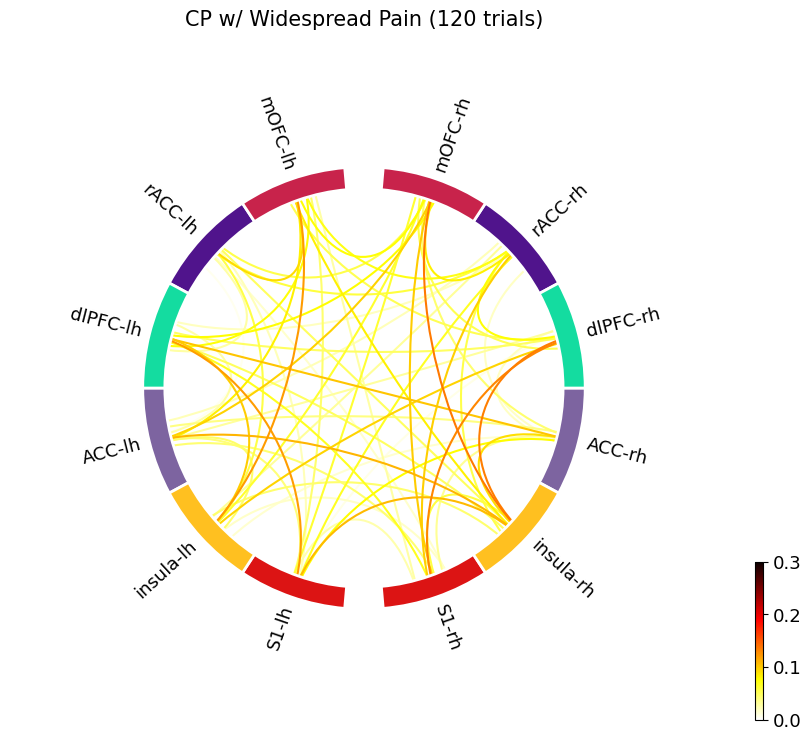

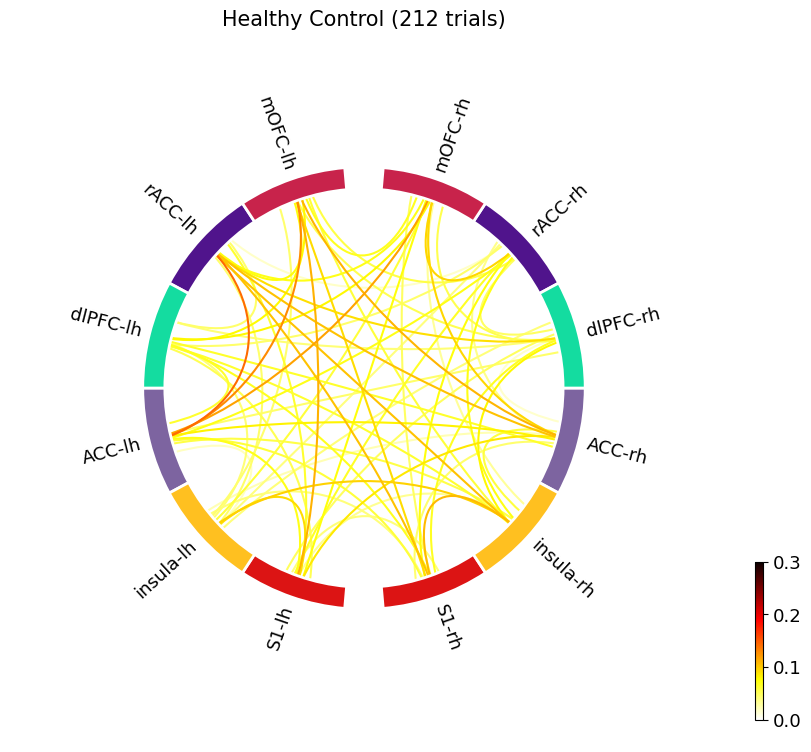

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - low-beta
Num epochs: 120 vs. 212
+--------------------+---------+----------------+----------------+
|      ROI Pair      | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+--------------------+---------+----------------+----------------+
| ACC-rh <-> mOFC-lh |  0.032  | 0.022 ± 0.015  |  0.075 ± 0.02  |
+--------------------+---------+----------------+----------------+


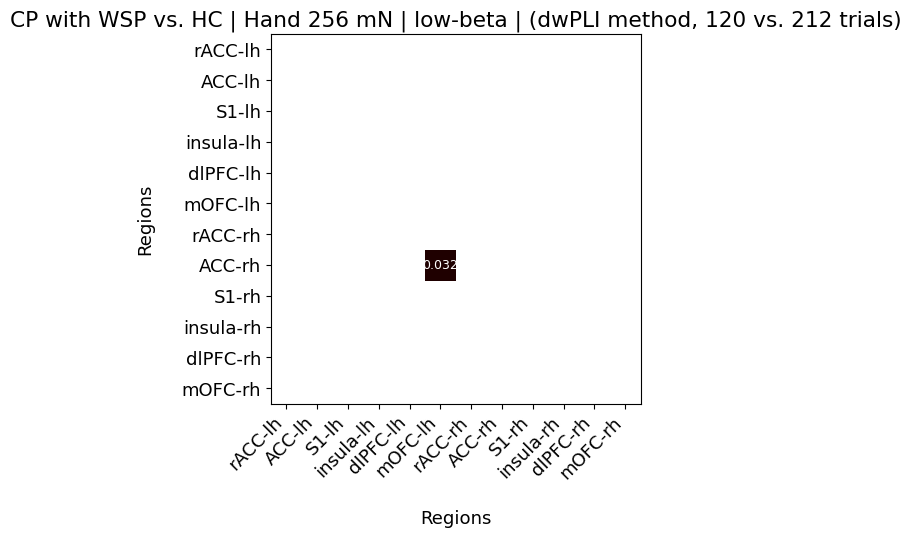

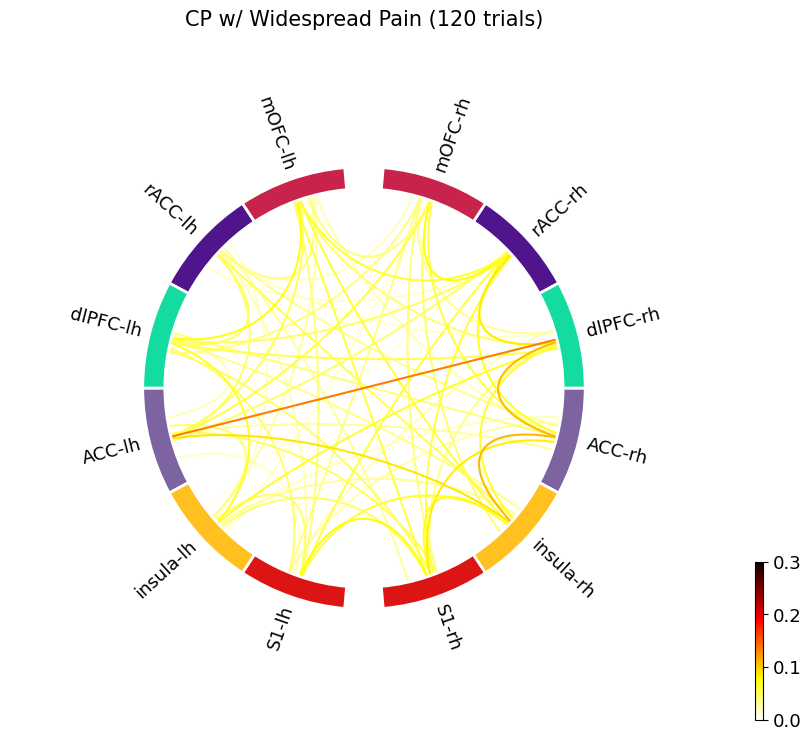

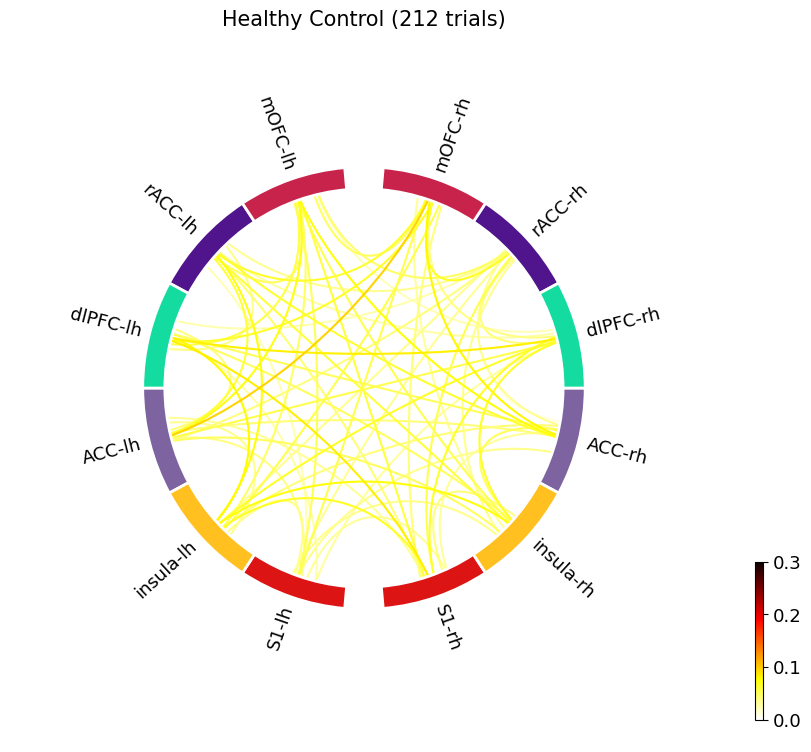

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - high-beta
Num epochs: 120 vs. 212
+------------------------+---------+----------------+----------------+
|        ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+------------------------+---------+----------------+----------------+
|   S1-lh <-> rACC-lh    |  0.026  | 0.113 ± 0.047  | 0.023 ± 0.016  |
| dlPFC-lh <-> insula-lh |  0.039  | 0.037 ± 0.017  | 0.094 ± 0.022  |
|  mOFC-lh <-> dlPFC-lh  |  0.016  | 0.124 ± 0.037  | 0.026 ± 0.017  |
|   rACC-rh <-> S1-lh    |  0.018  | 0.091 ± 0.028  | 0.024 ± 0.013  |
|  ACC-rh <-> dlPFC-lh   |  0.018  | 0.004 ± 0.003  | 0.057 ± 0.018  |
|   mOFC-rh <-> ACC-rh   |  0.047  | 0.006 ± 0.004  | 0.047 ± 0.013  |
+------------------------+---------+----------------+----------------+


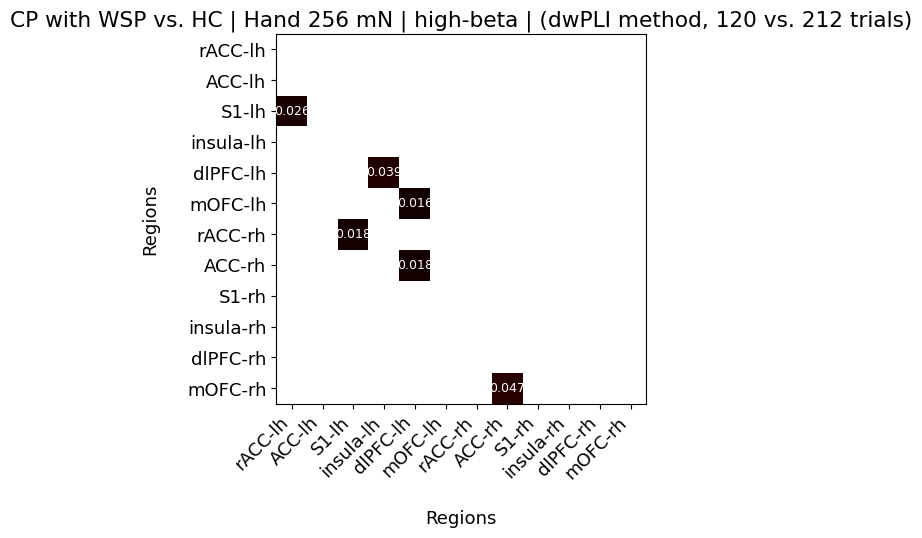

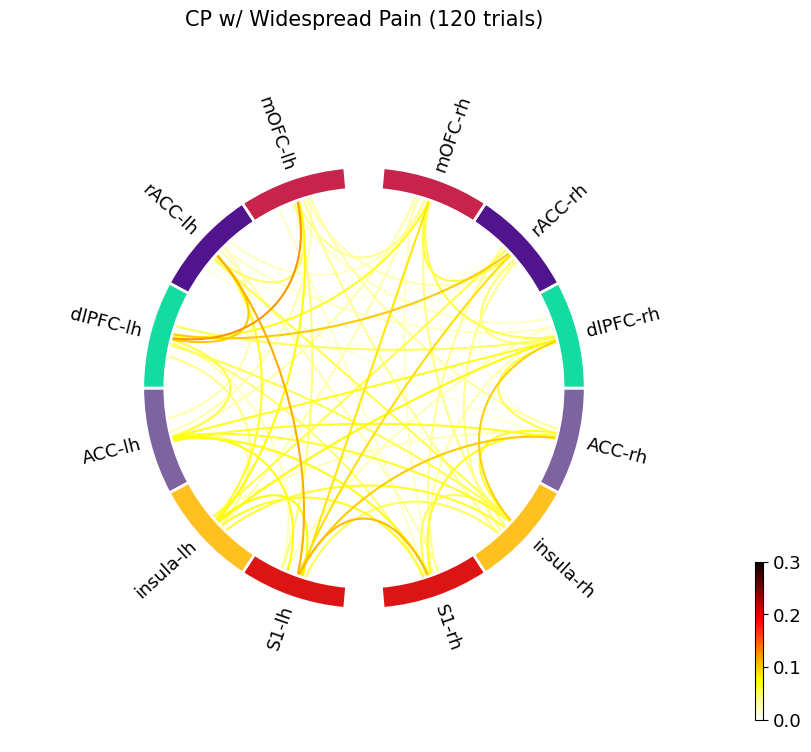

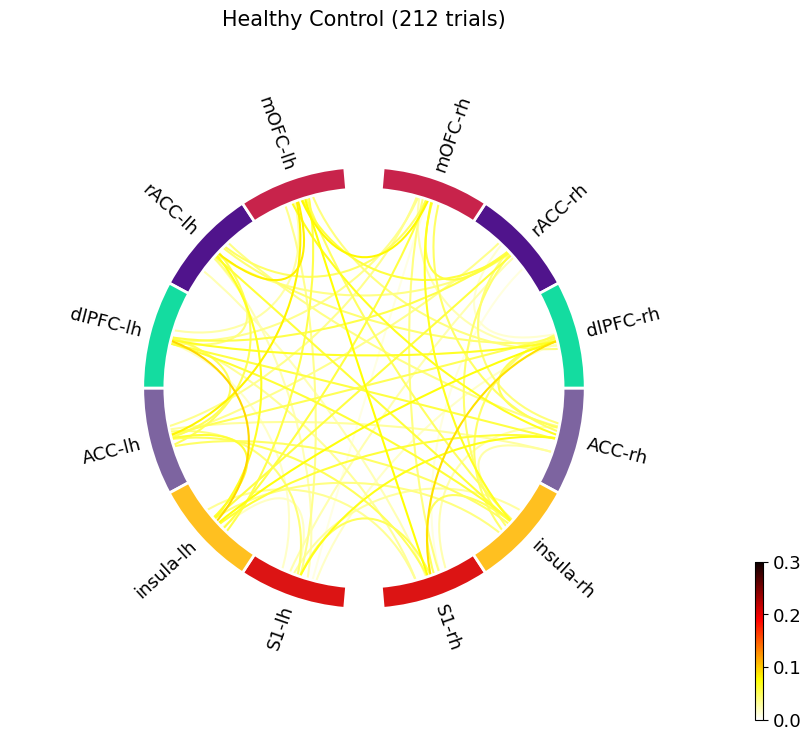

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - low-gamma-i
Num epochs: 120 vs. 212
+-----------------------+---------+----------------+----------------+
|       ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-----------------------+---------+----------------+----------------+
| dlPFC-lh <-> rACC-lh  |  0.009  | 0.095 ± 0.032  | 0.012 ± 0.005  |
| rACC-rh <-> dlPFC-lh  |  0.028  |  0.058 ± 0.02  |  0.01 ± 0.005  |
| insula-rh <-> rACC-rh |  0.029  | 0.013 ± 0.008  | 0.058 ± 0.015  |
|  insula-rh <-> S1-rh  |  0.032  | 0.009 ± 0.009  | 0.041 ± 0.018  |
| mOFC-rh <-> insula-rh |  0.02   | 0.017 ± 0.017  |  0.05 ± 0.014  |
+-----------------------+---------+----------------+----------------+


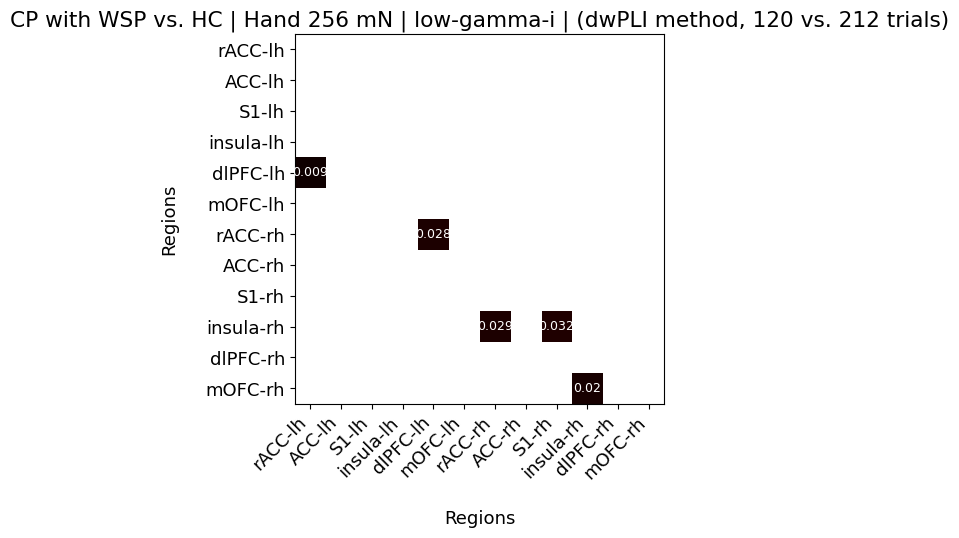

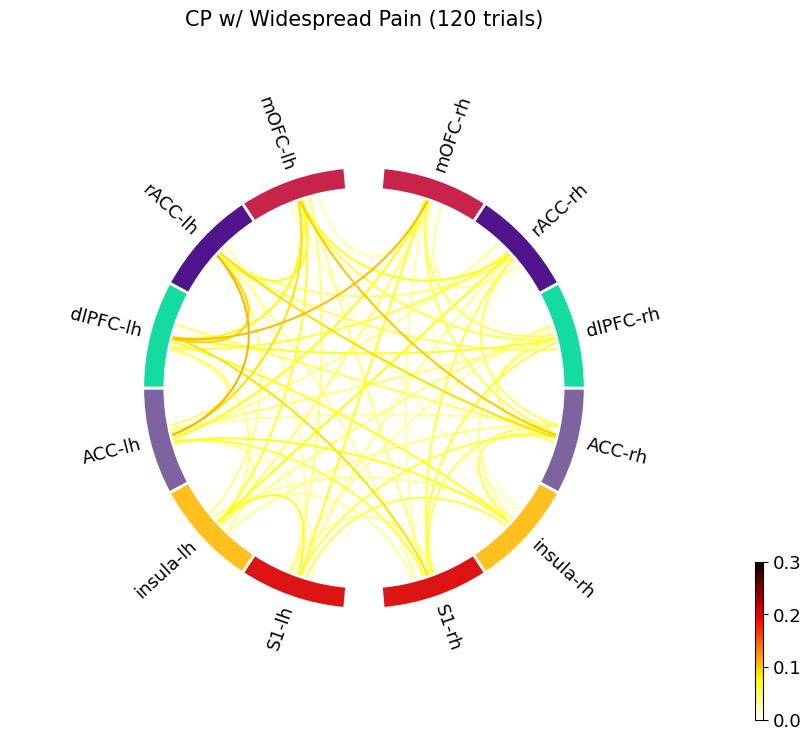

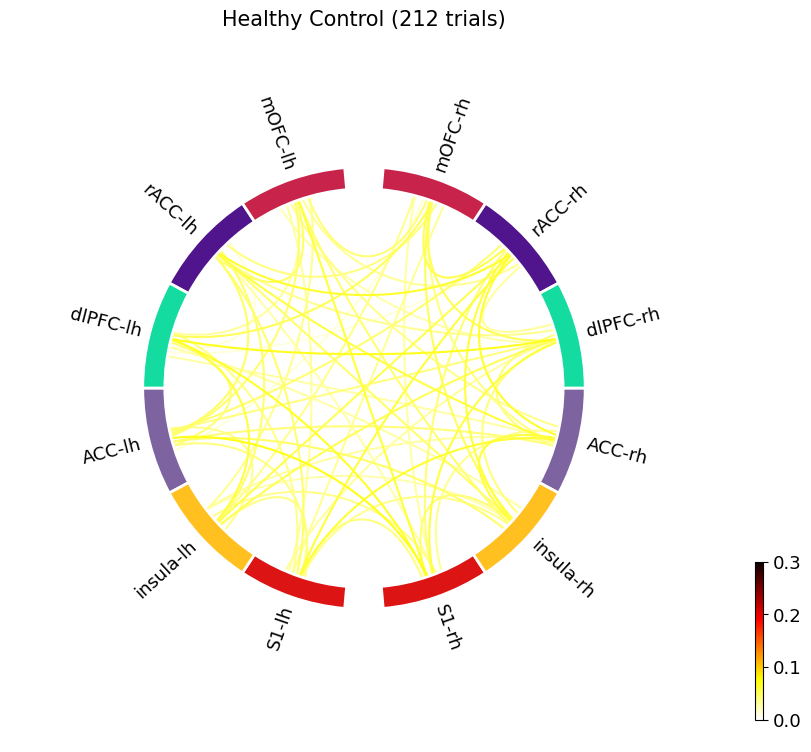

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - low-gamma-ii
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| dlPFC-rh <-> ACC-rh |  0.038  | 0.002 ± 0.002  | 0.025 ± 0.009  |
+---------------------+---------+----------------+----------------+


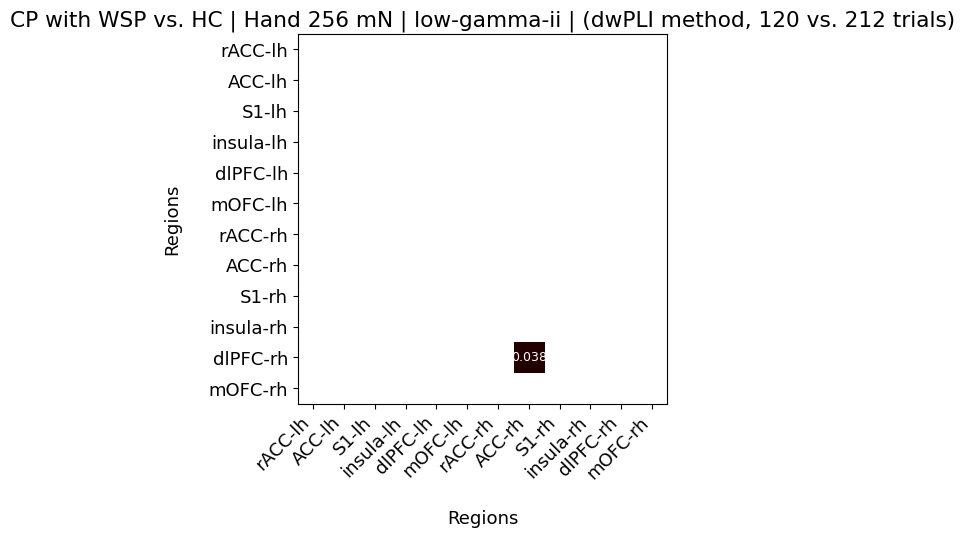

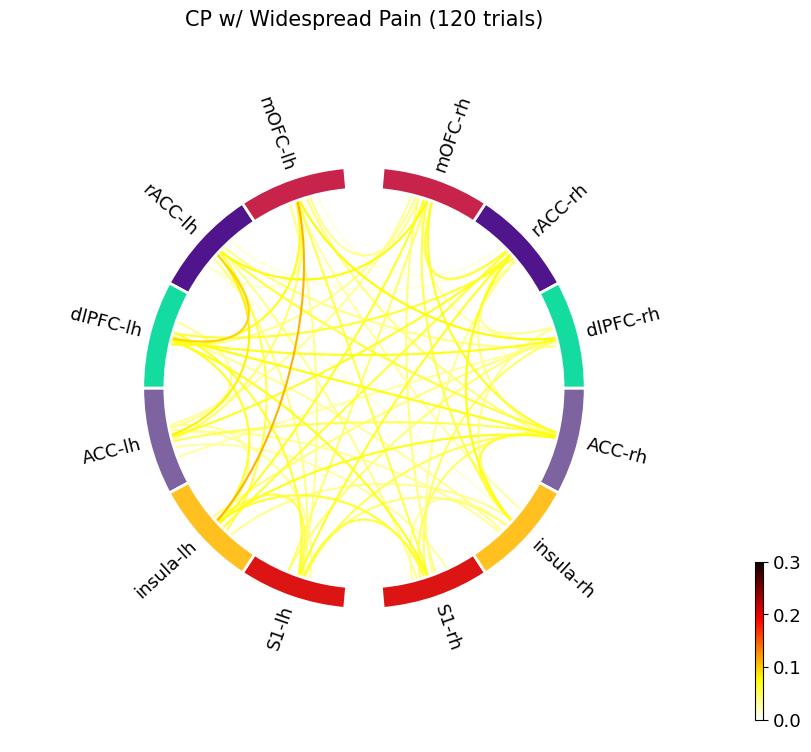

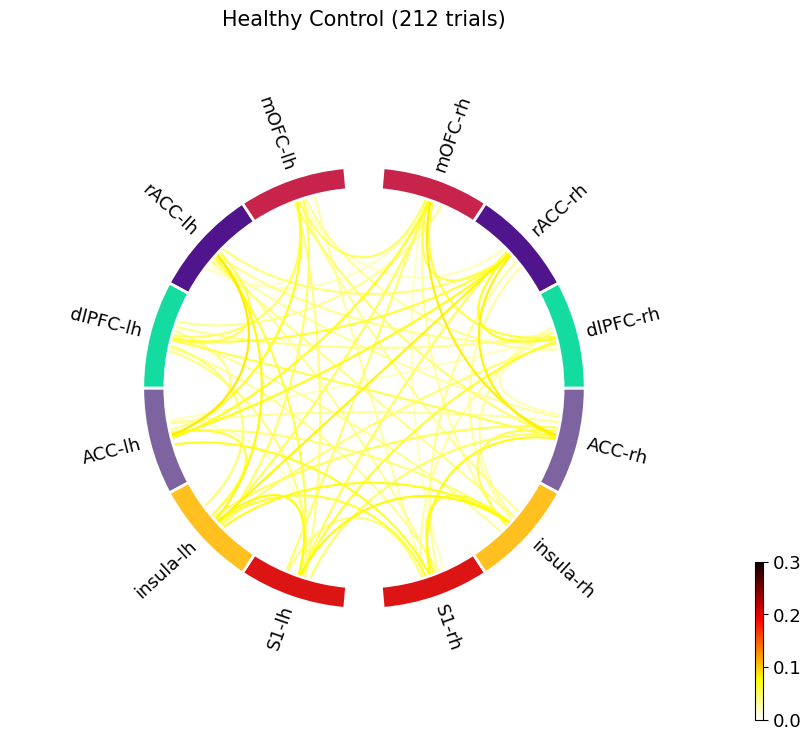

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - high-gamma-i
Num epochs: 120 vs. 212
+-------------------------+---------+----------------+----------------+
|        ROI Pair         | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-------------------------+---------+----------------+----------------+
|   mOFC-lh <-> ACC-lh    |  0.048  | 0.075 ± 0.039  | 0.007 ± 0.004  |
| insula-rh <-> insula-lh |  0.033  | 0.025 ± 0.016  | 0.068 ± 0.017  |
| insula-rh <-> dlPFC-lh  |  0.009  | 0.104 ± 0.029  | 0.014 ± 0.008  |
+-------------------------+---------+----------------+----------------+


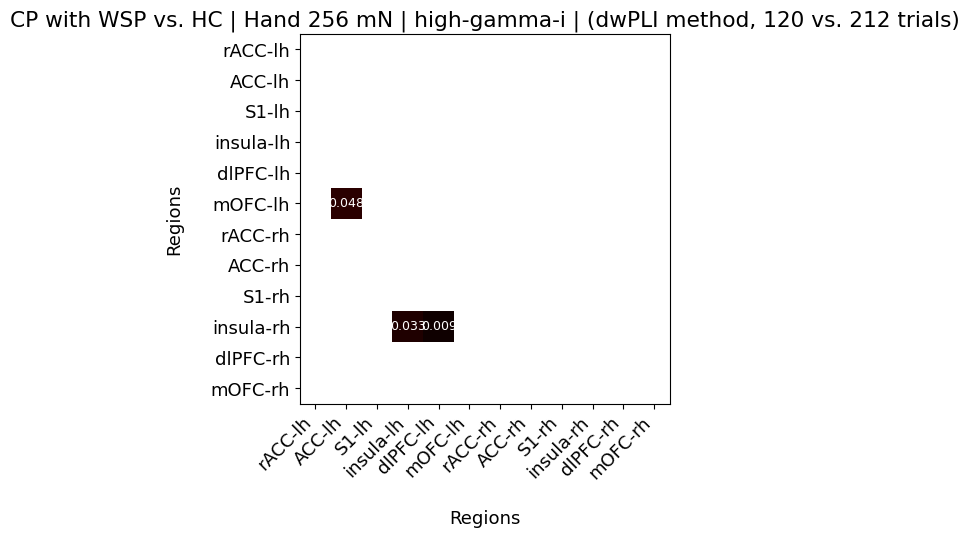

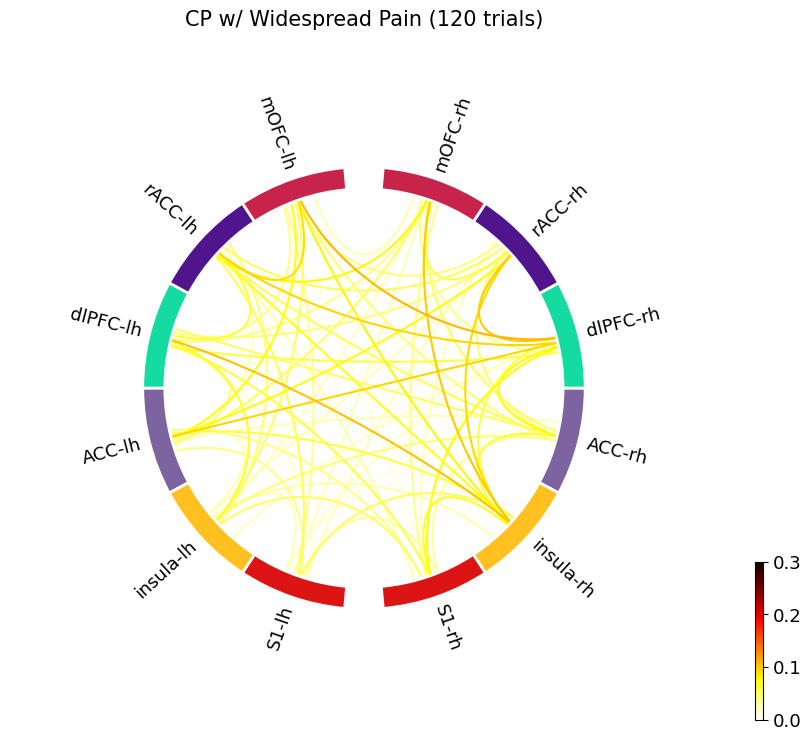

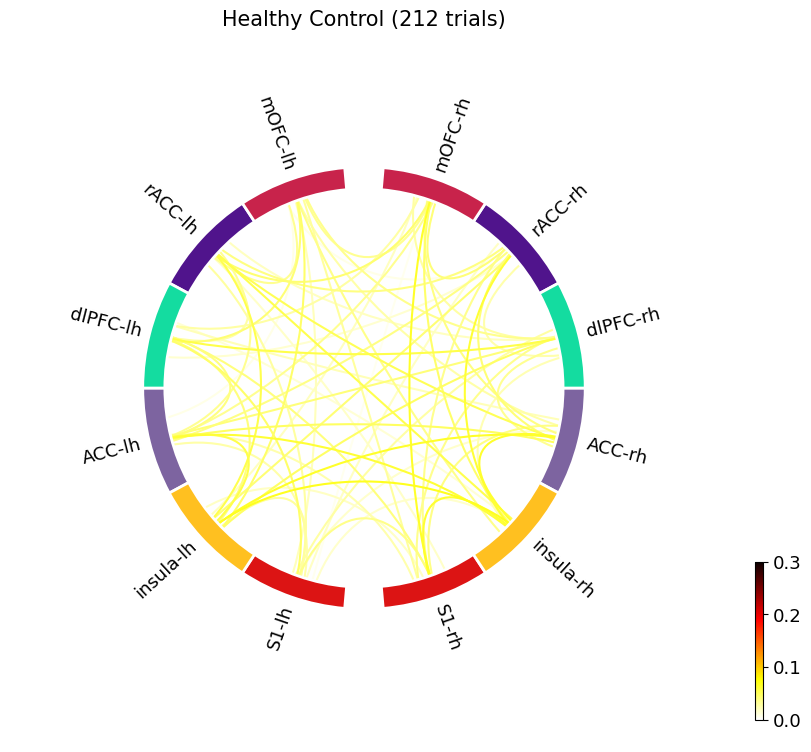

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - wpli2_debiased - high-gamma-ii
Num epochs: 120 vs. 212
+-------------------------+---------+----------------+----------------+
|        ROI Pair         | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-------------------------+---------+----------------+----------------+
|    S1-rh <-> rACC-lh    |  0.016  | 0.011 ± 0.008  | 0.058 ± 0.014  |
| insula-rh <-> insula-lh |  0.045  | 0.014 ± 0.005  | 0.054 ± 0.013  |
|   dlPFC-rh <-> ACC-lh   |  0.009  | 0.089 ± 0.034  | 0.018 ± 0.013  |
+-------------------------+---------+----------------+----------------+


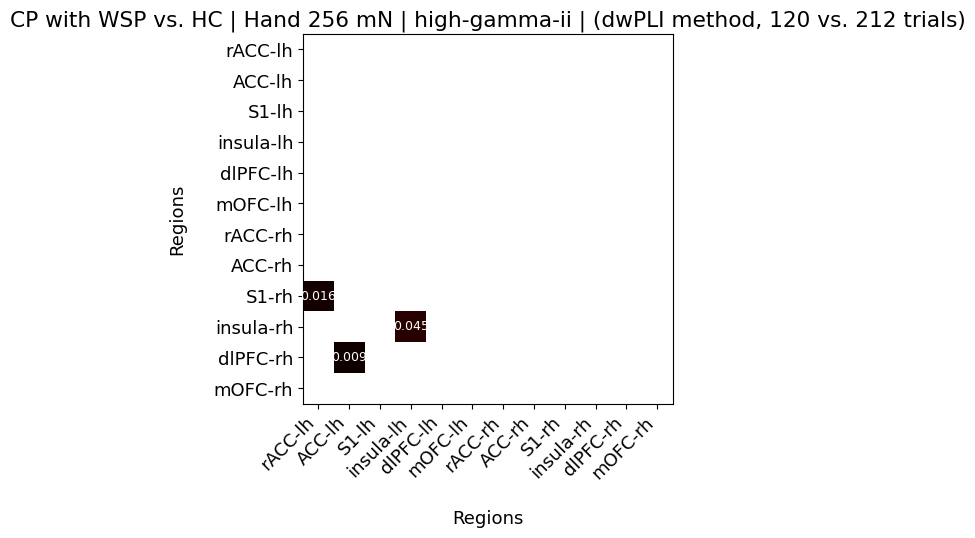

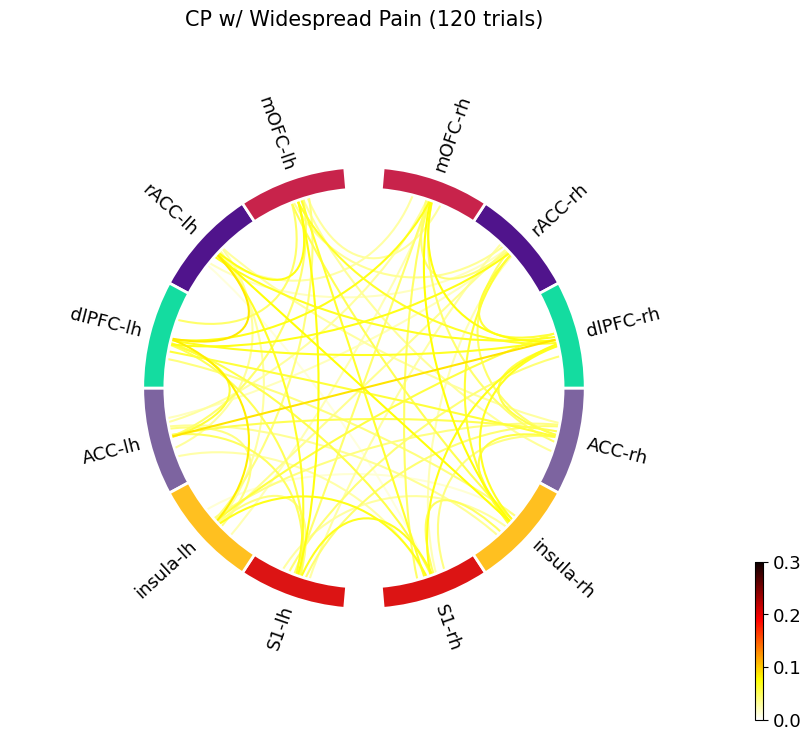

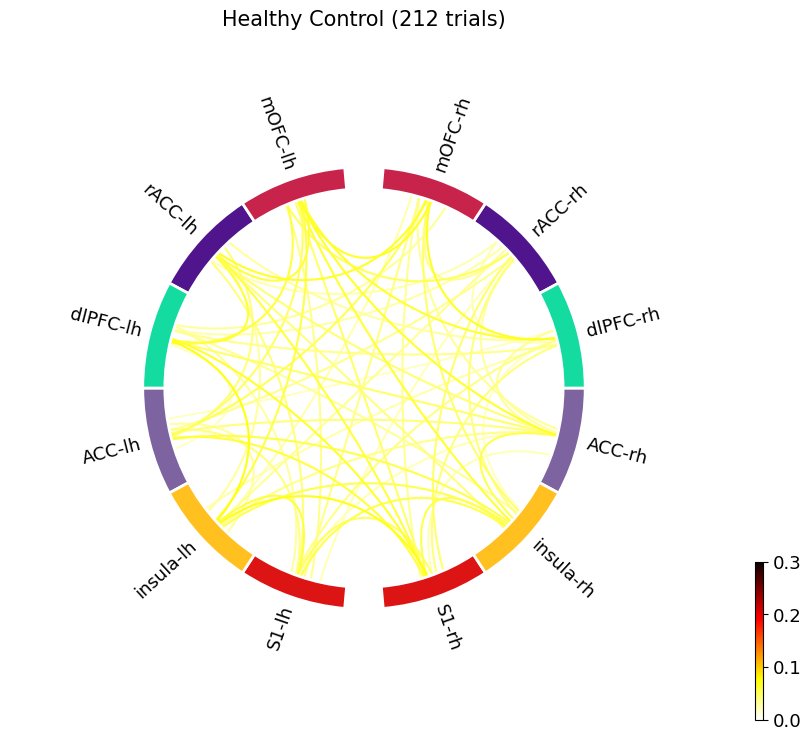

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - theta
Num epochs: 120 vs. 212
+------------------------+---------+----------------+----------------+
|        ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+------------------------+---------+----------------+----------------+
|   ACC-lh <-> rACC-lh   |  0.008  | 0.072 ± 0.018  | 0.164 ± 0.022  |
|  insula-lh <-> ACC-lh  |  0.022  | 0.087 ± 0.019  | 0.158 ± 0.018  |
| dlPFC-lh <-> insula-lh |  0.033  | 0.102 ± 0.022  | 0.172 ± 0.018  |
|  dlPFC-rh <-> ACC-rh   |  0.02   | 0.188 ± 0.032  | 0.098 ± 0.017  |
+------------------------+---------+----------------+----------------+


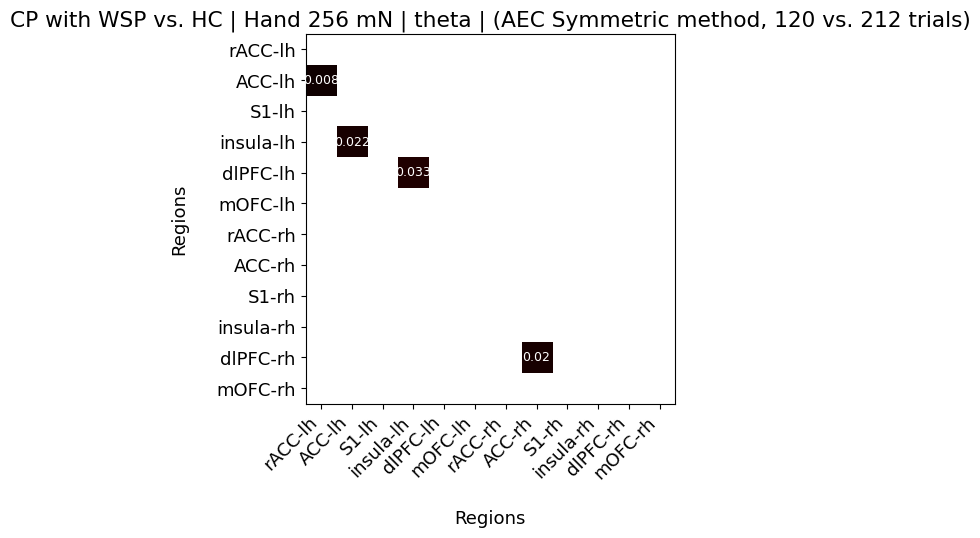

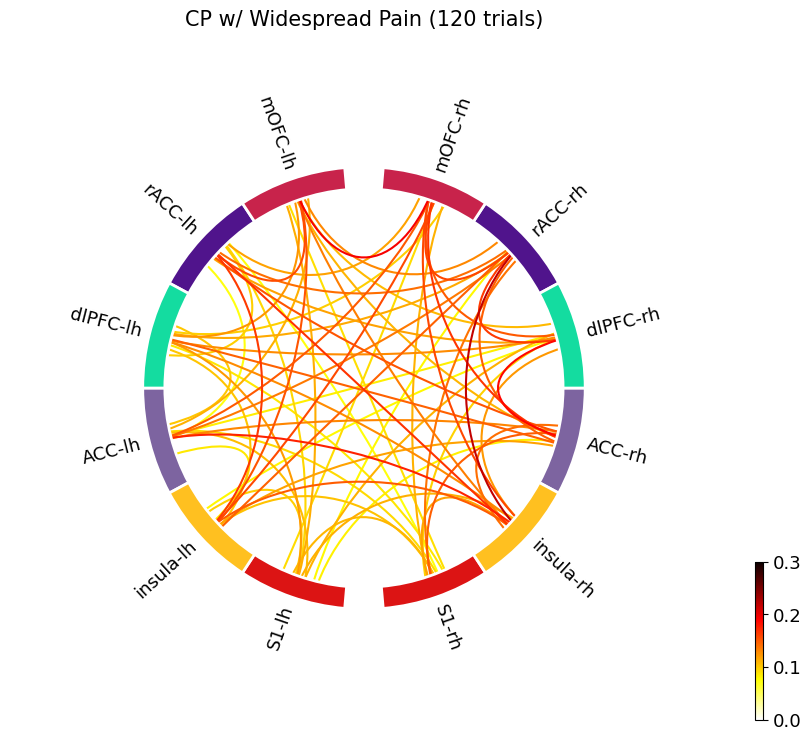

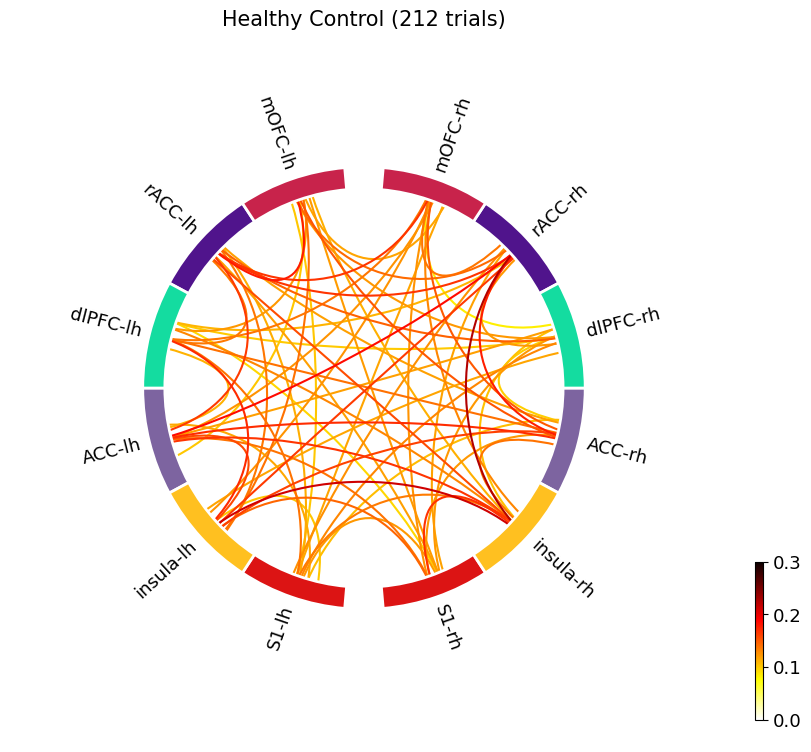

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - low-alpha
Num epochs: 120 vs. 212
+----------------------+---------+----------------+----------------+
|       ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+----------------------+---------+----------------+----------------+
| mOFC-lh <-> rACC-lh  |  0.003  | 0.051 ± 0.012  | 0.124 ± 0.016  |
|  rACC-rh <-> S1-lh   |  0.049  | 0.053 ± 0.011  | 0.092 ± 0.014  |
| dlPFC-rh <-> rACC-lh |  0.027  | 0.112 ± 0.011  | 0.074 ± 0.017  |
+----------------------+---------+----------------+----------------+


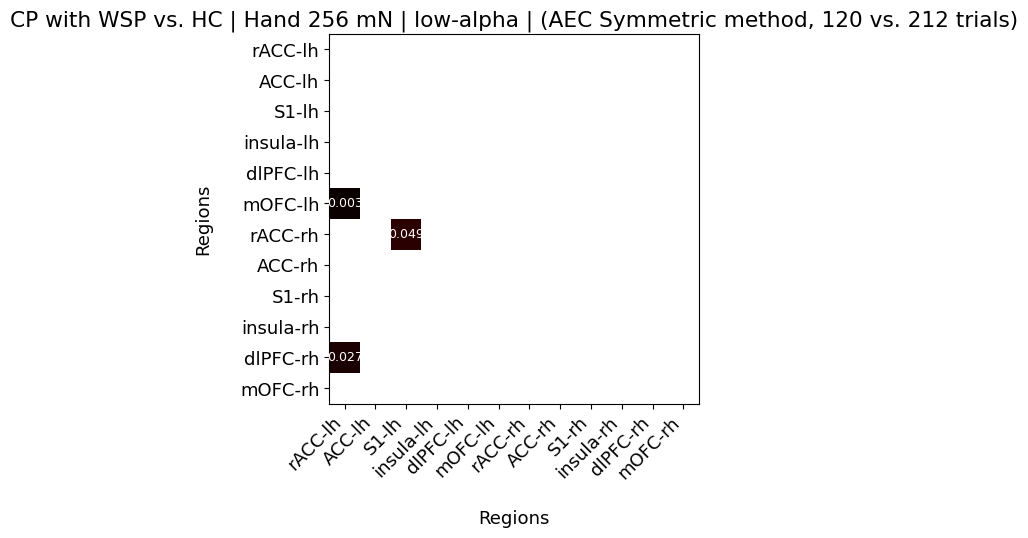

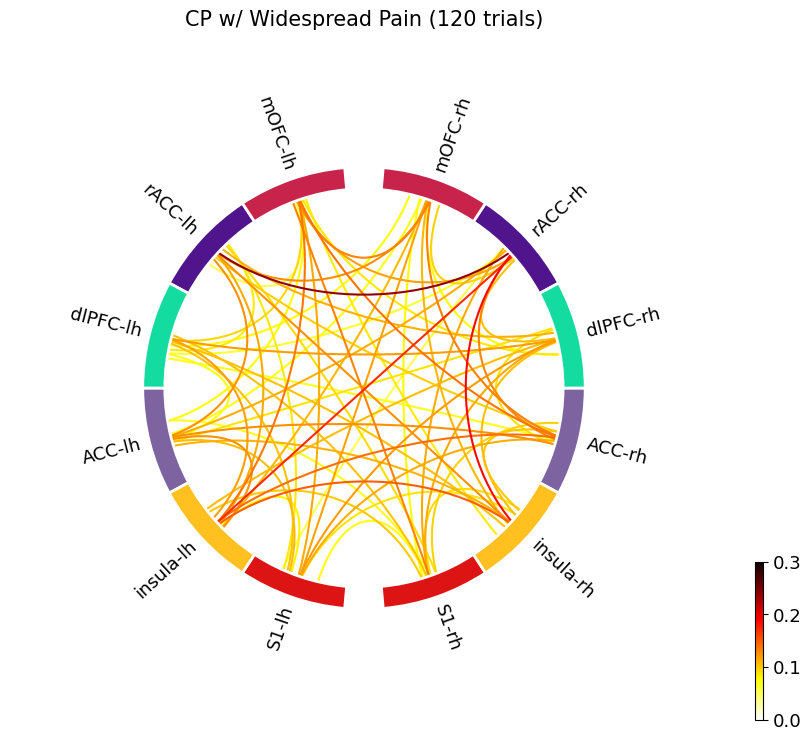

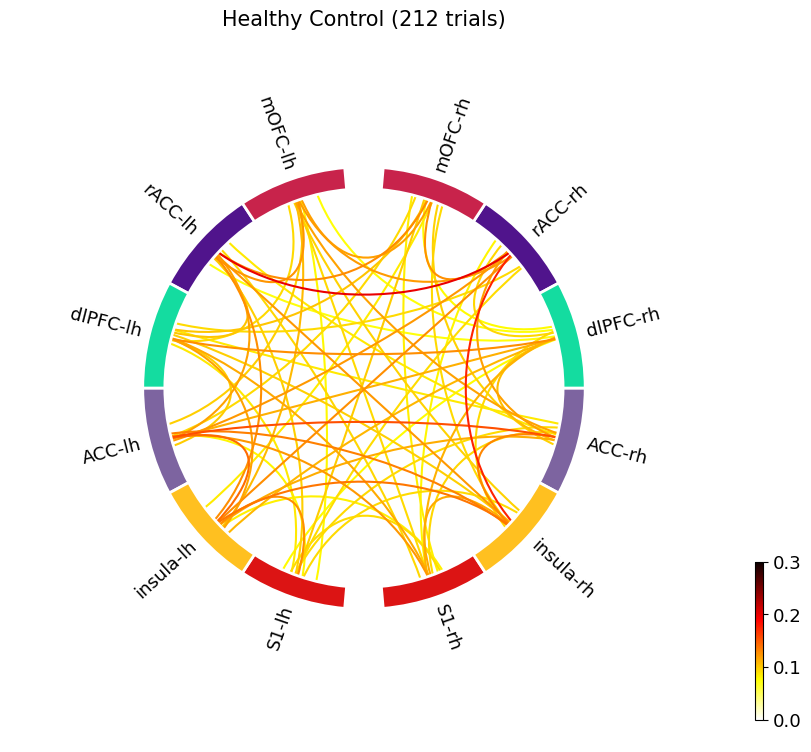

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - high-alpha
Num epochs: 120 vs. 212
+-----------------------+---------+----------------+----------------+
|       ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-----------------------+---------+----------------+----------------+
| dlPFC-rh <-> dlPFC-lh |  0.049  |  0.14 ± 0.03   | 0.087 ± 0.018  |
+-----------------------+---------+----------------+----------------+


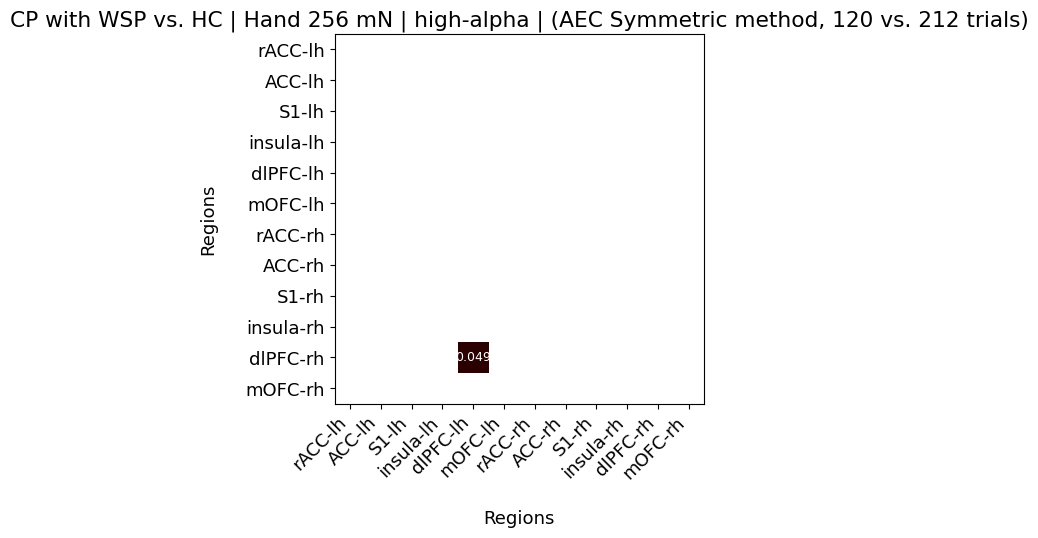

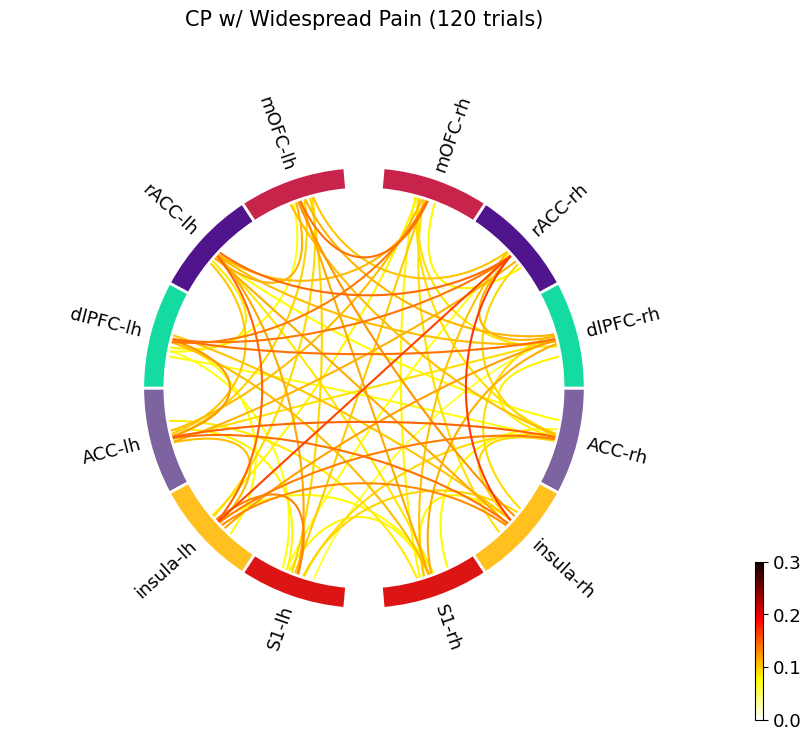

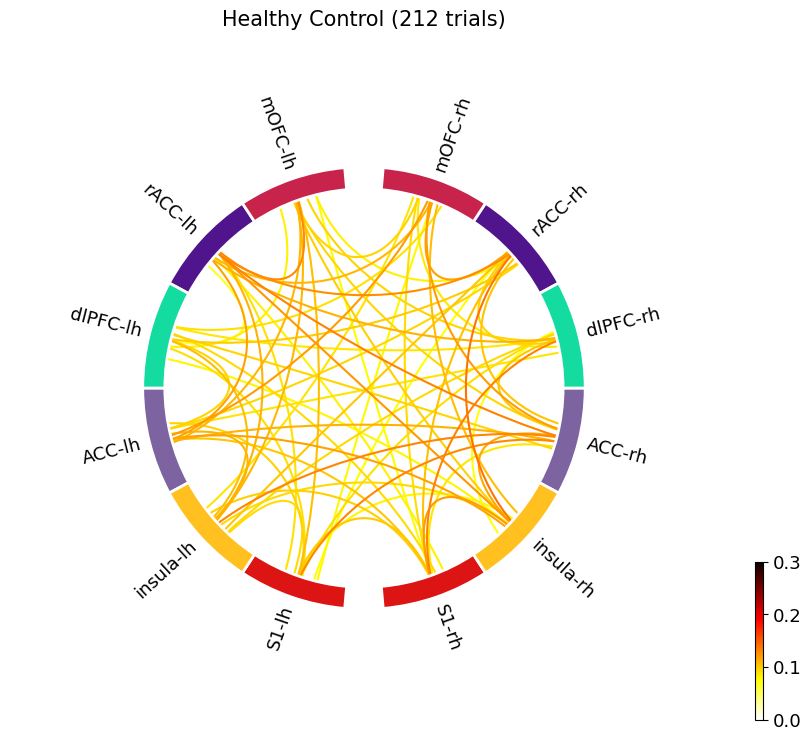

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - low-beta
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| dlPFC-lh <-> ACC-lh |  0.014  | 0.154 ± 0.022  | 0.086 ± 0.016  |
| ACC-rh <-> rACC-rh  |  0.004  | 0.051 ± 0.015  |  0.1 ± 0.011   |
|  mOFC-rh <-> S1-lh  |  0.013  | 0.086 ± 0.017  | 0.037 ± 0.008  |
| mOFC-rh <-> ACC-rh  |  0.001  | 0.041 ± 0.008  |  0.09 ± 0.012  |
+---------------------+---------+----------------+----------------+


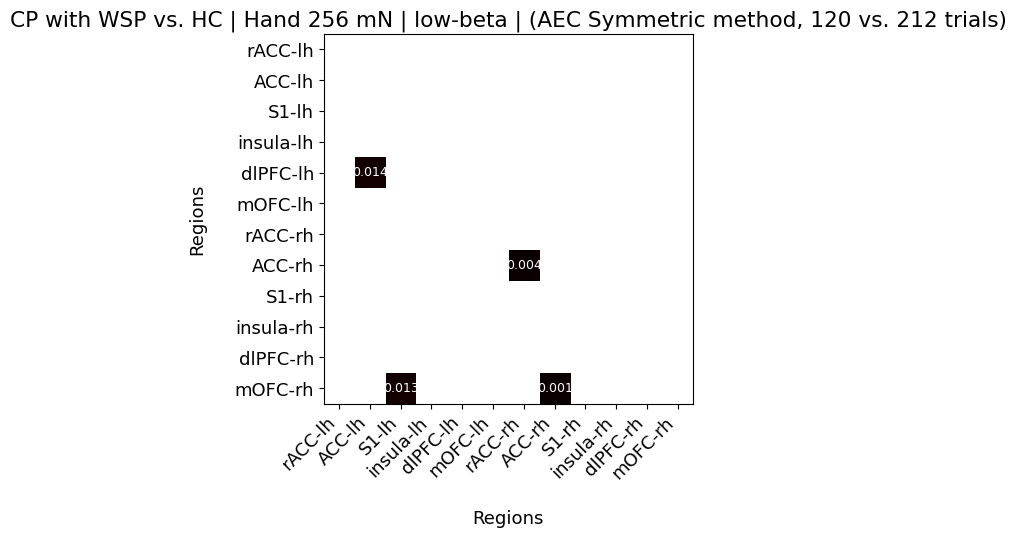

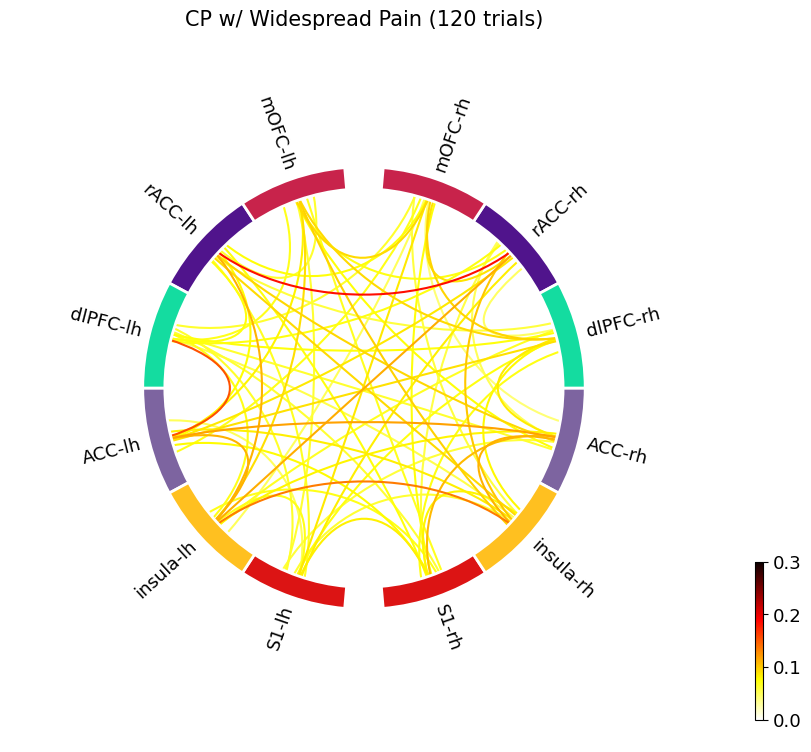

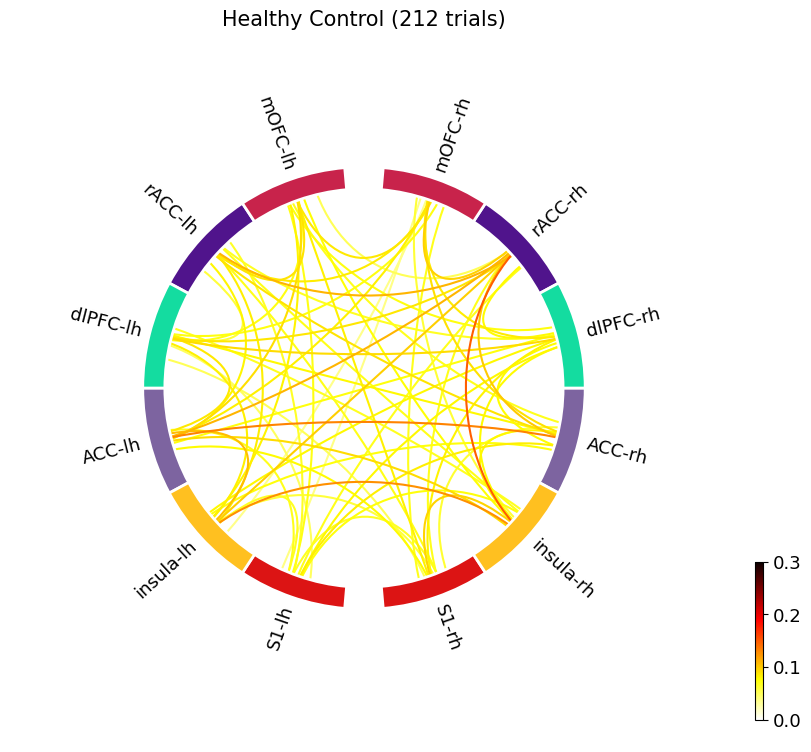

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - high-beta
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| insula-lh <-> S1-lh |  0.02   | 0.117 ± 0.022  |  0.06 ± 0.01   |
| dlPFC-lh <-> S1-lh  |  0.045  |  0.103 ± 0.02  | 0.057 ± 0.012  |
| mOFC-lh <-> ACC-lh  |  0.018  | 0.125 ± 0.022  |  0.06 ± 0.01   |
|  ACC-rh <-> S1-lh   |  0.041  | 0.073 ± 0.012  | 0.049 ± 0.013  |
| mOFC-rh <-> rACC-rh |  0.033  | 0.051 ± 0.009  | 0.097 ± 0.018  |
+---------------------+---------+----------------+----------------+


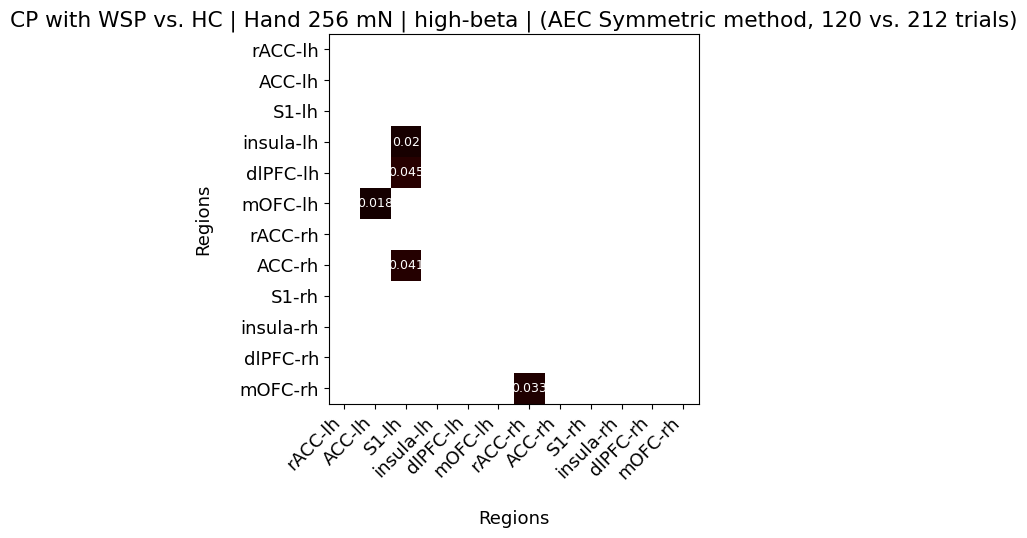

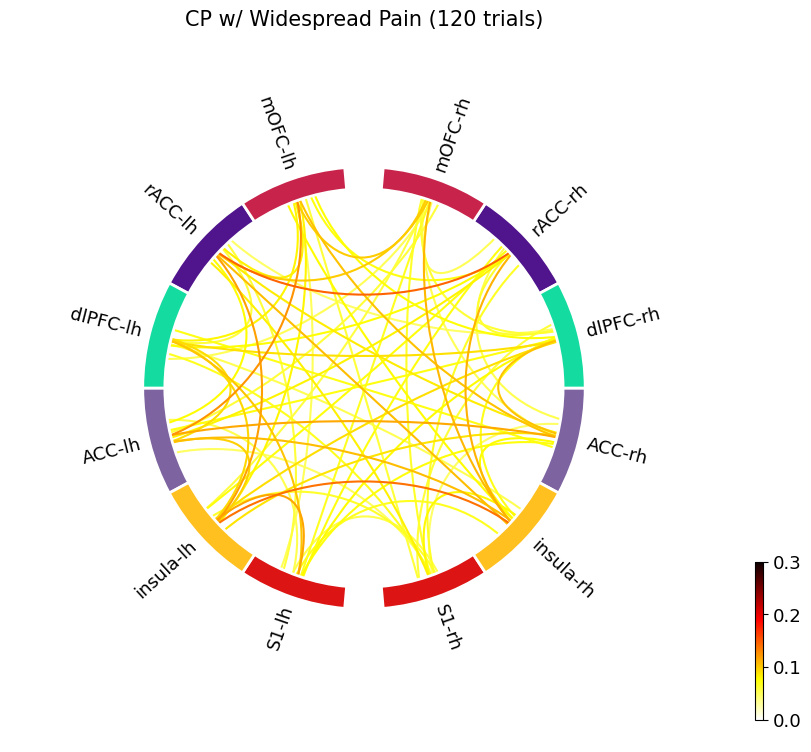

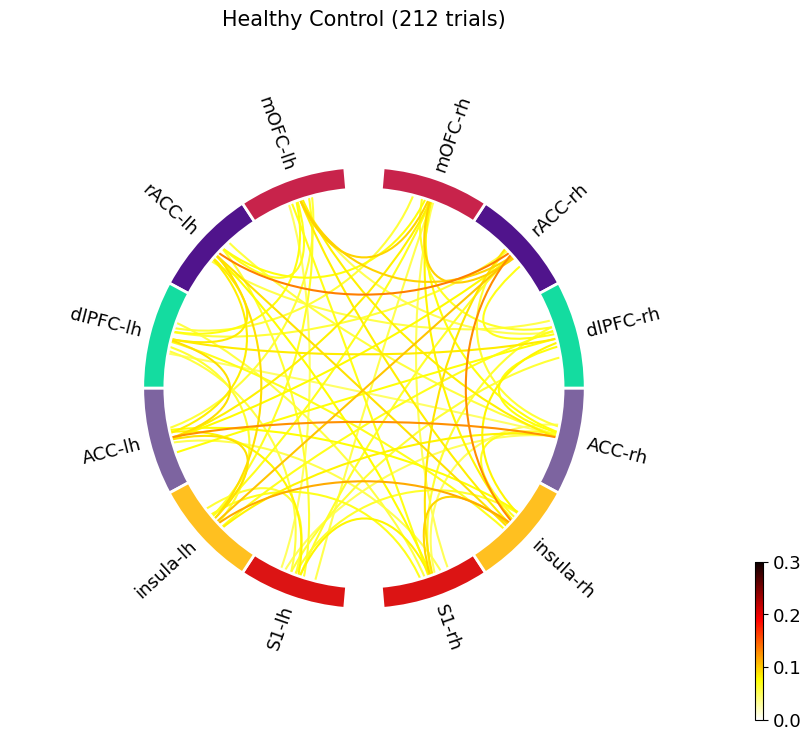

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - low-gamma-i
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| S1-rh <-> insula-lh |  0.009  | 0.088 ± 0.012  | 0.043 ± 0.009  |
+---------------------+---------+----------------+----------------+


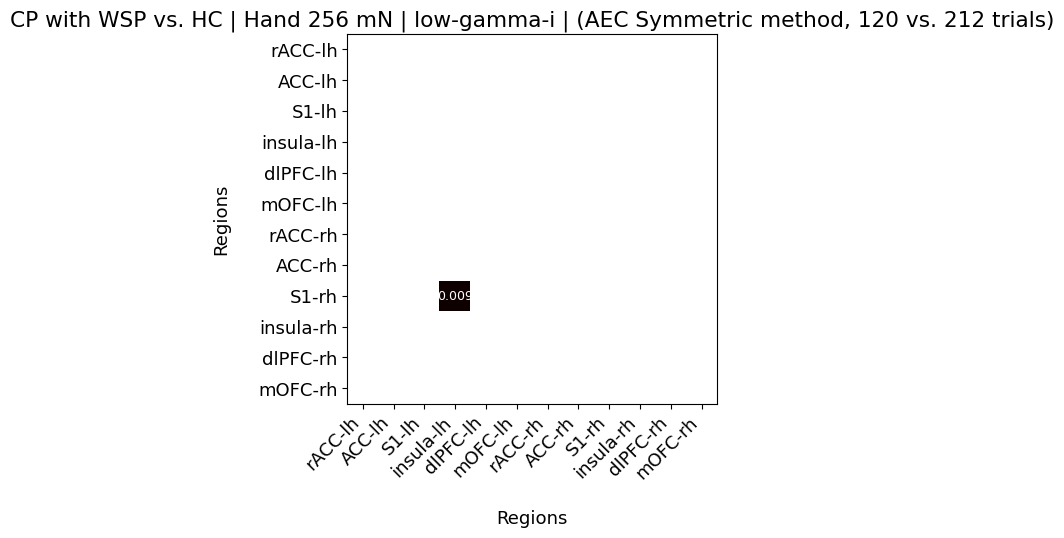

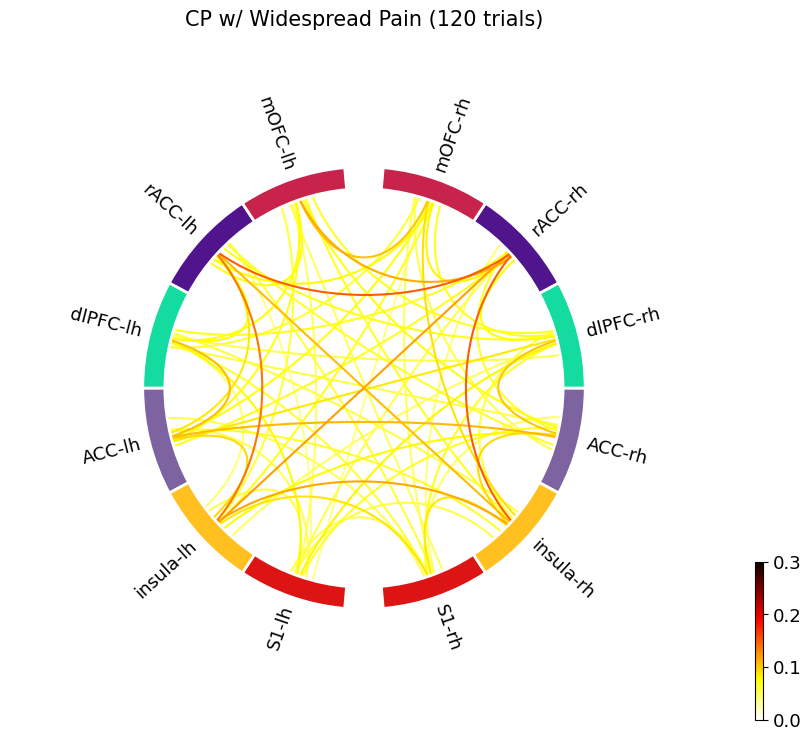

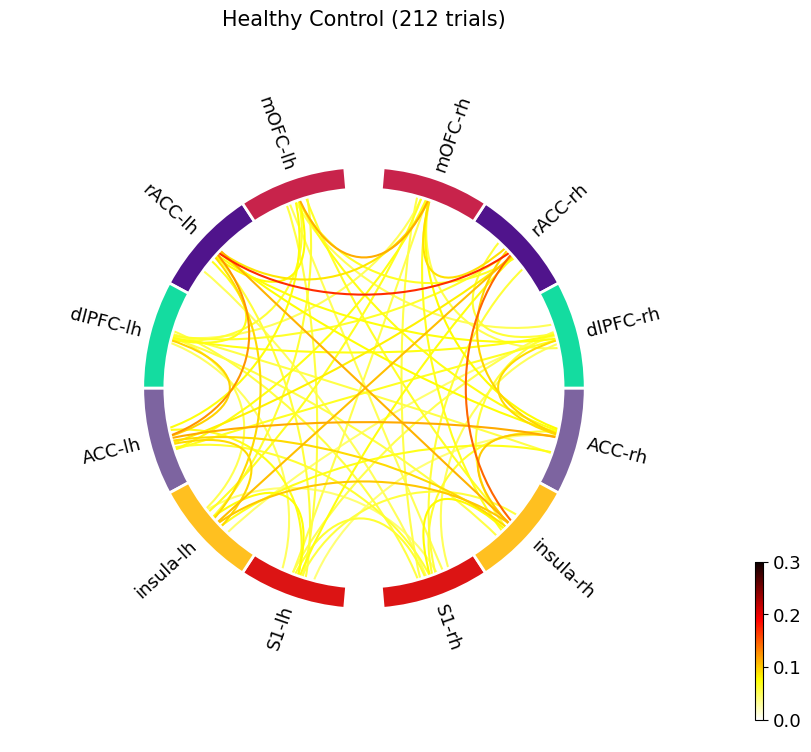

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - low-gamma-ii
Num epochs: 120 vs. 212
+-----------------------+---------+----------------+----------------+
|       ROI Pair        | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+-----------------------+---------+----------------+----------------+
|  ACC-lh <-> rACC-lh   |  0.045  | 0.079 ± 0.012  | 0.123 ± 0.014  |
| insula-rh <-> rACC-lh |  0.024  | 0.136 ± 0.022  |  0.081 ± 0.01  |
|  dlPFC-rh <-> ACC-lh  |  0.033  | 0.095 ± 0.016  | 0.053 ± 0.008  |
| dlPFC-rh <-> dlPFC-lh |  0.049  | 0.088 ± 0.016  |  0.053 ± 0.01  |
| mOFC-rh <-> dlPFC-lh  |  0.041  | 0.099 ± 0.024  |  0.06 ± 0.009  |
+-----------------------+---------+----------------+----------------+


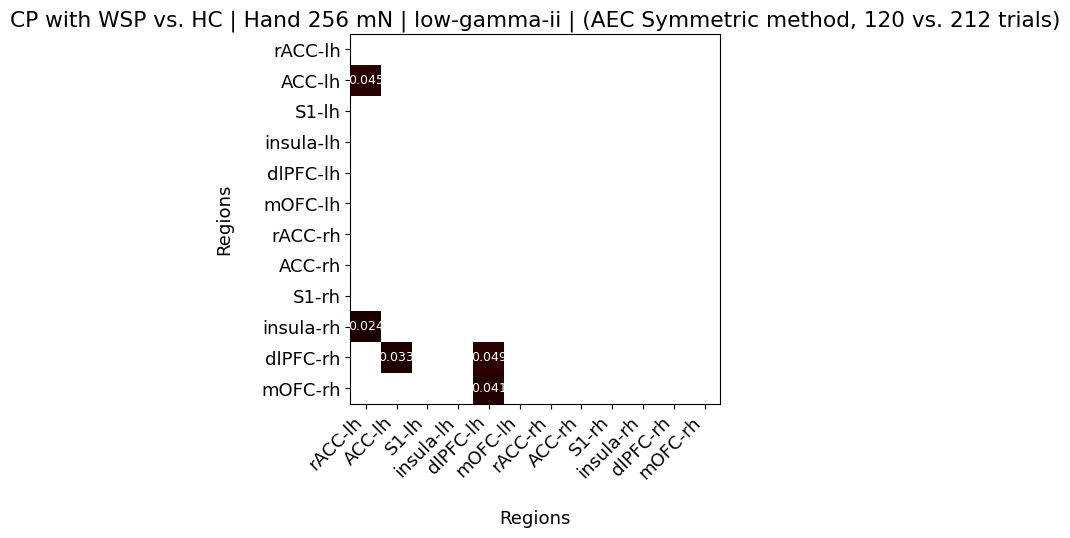

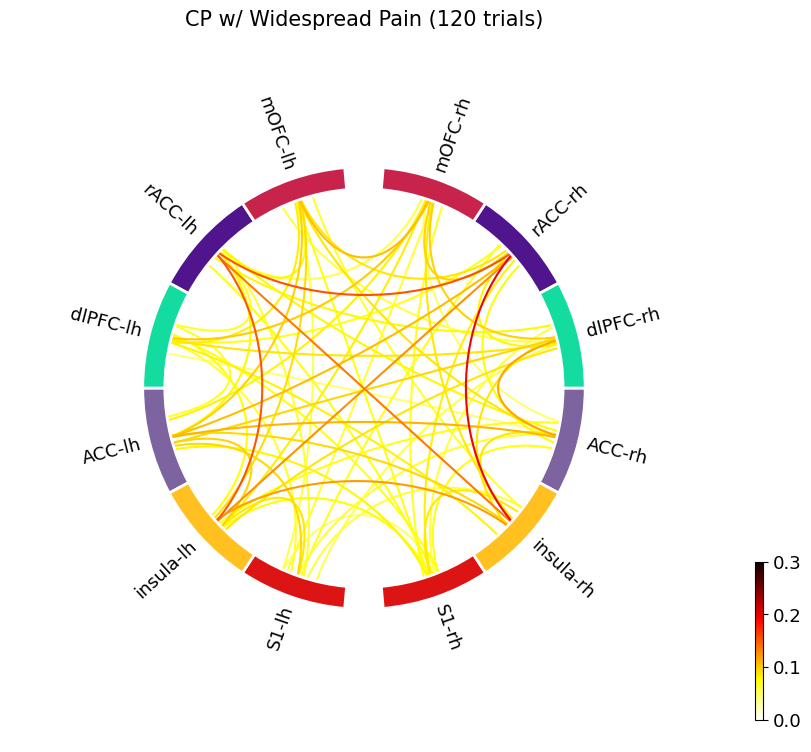

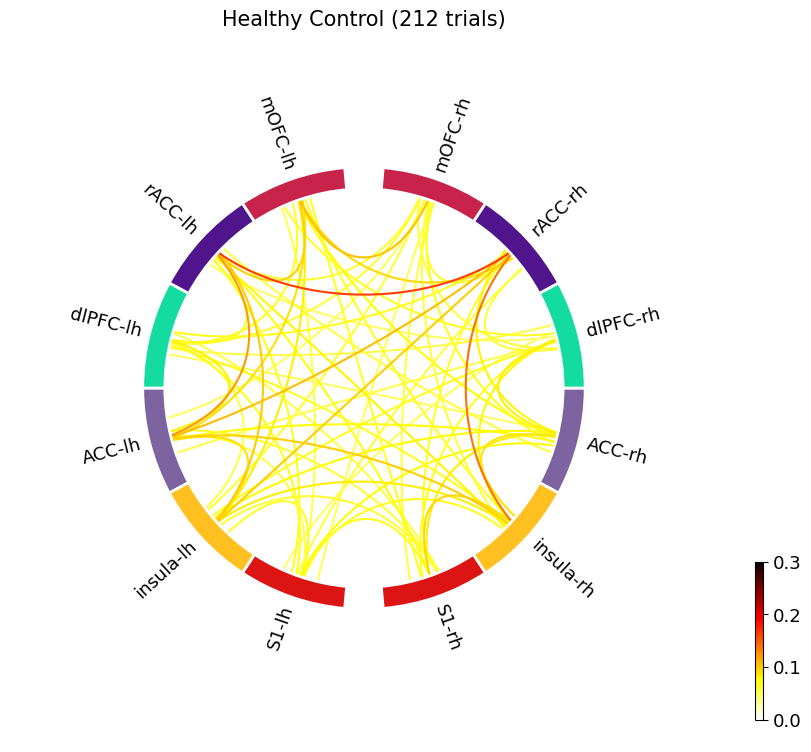

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - high-gamma-i
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| ACC-lh <-> rACC-lh  |  0.045  | 0.075 ± 0.012  |  0.12 ± 0.016  |
| ACC-rh <-> mOFC-lh  |  0.006  | 0.114 ± 0.018  | 0.054 ± 0.008  |
| dlPFC-rh <-> ACC-rh |  0.024  | 0.123 ± 0.021  |  0.07 ± 0.011  |
+---------------------+---------+----------------+----------------+


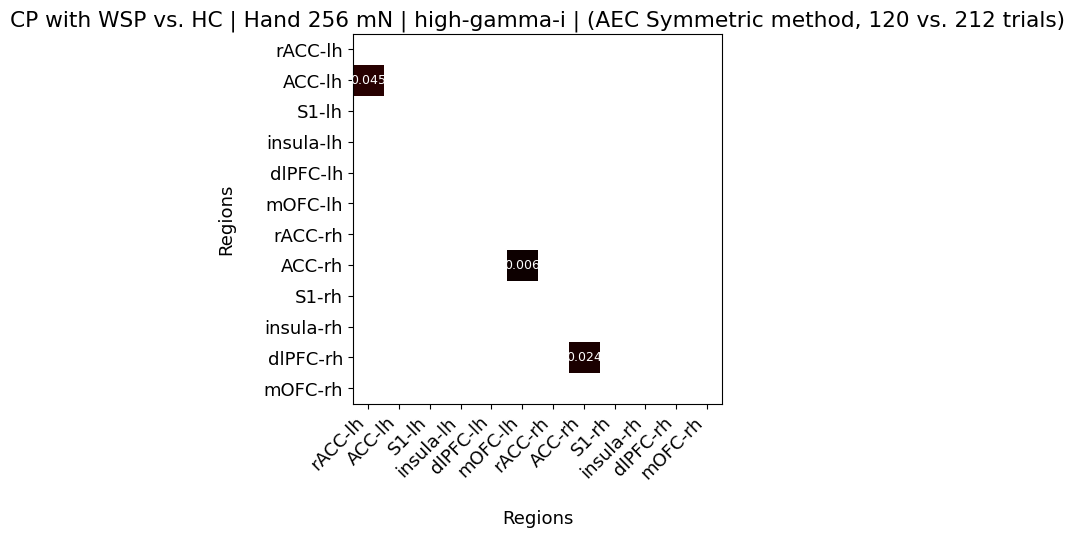

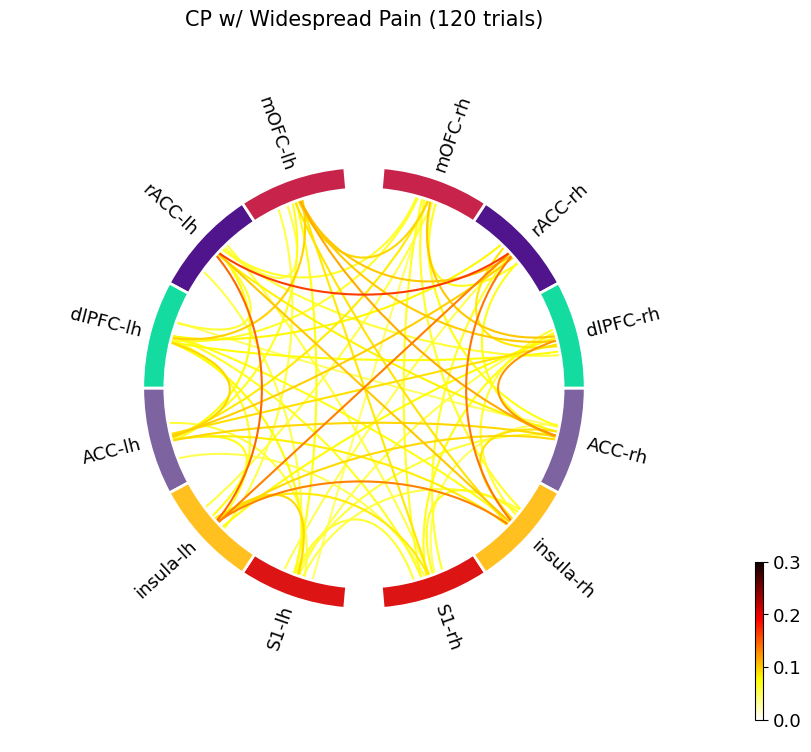

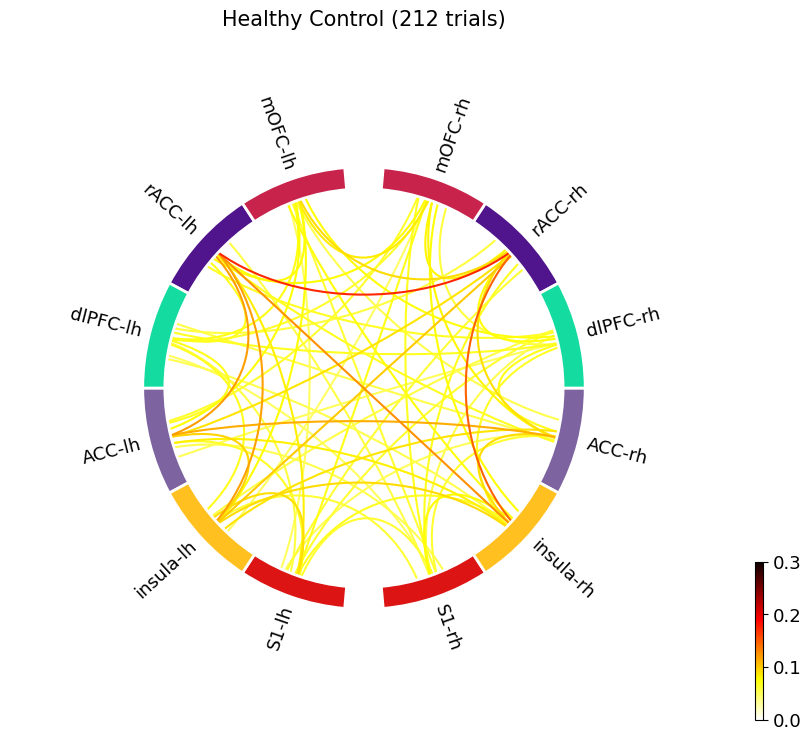

Hand 256 mN - CP w/ Widespread Pain vs. Healthy Control - aec_symmetric - high-gamma-ii
Num epochs: 120 vs. 212
+---------------------+---------+----------------+----------------+
|      ROI Pair       | P-Value | Mean ± SEM (1) | Mean ± SEM (2) |
+---------------------+---------+----------------+----------------+
| dlPFC-lh <-> ACC-lh |  0.03   | 0.056 ± 0.015  | 0.098 ± 0.013  |
+---------------------+---------+----------------+----------------+


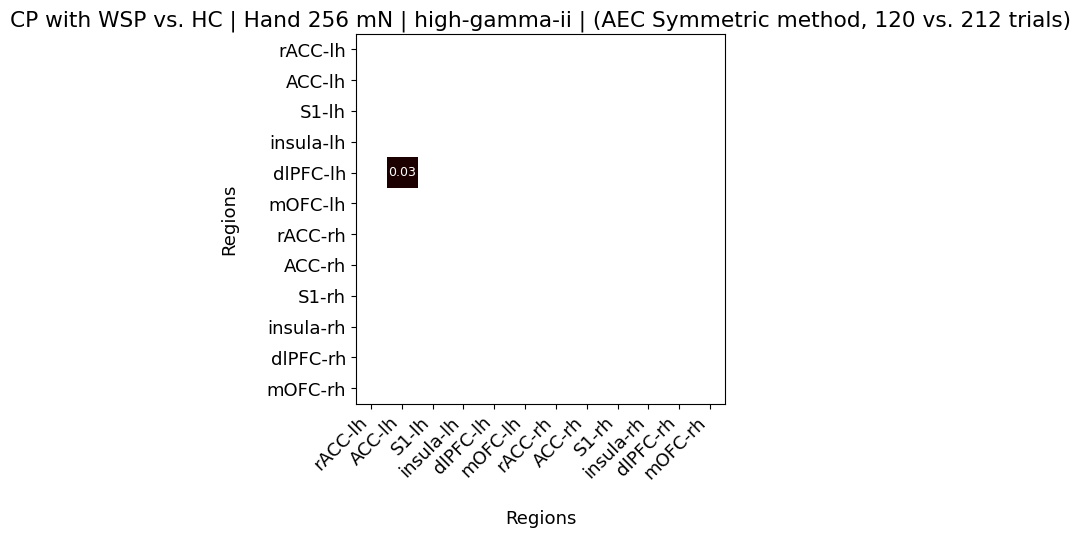

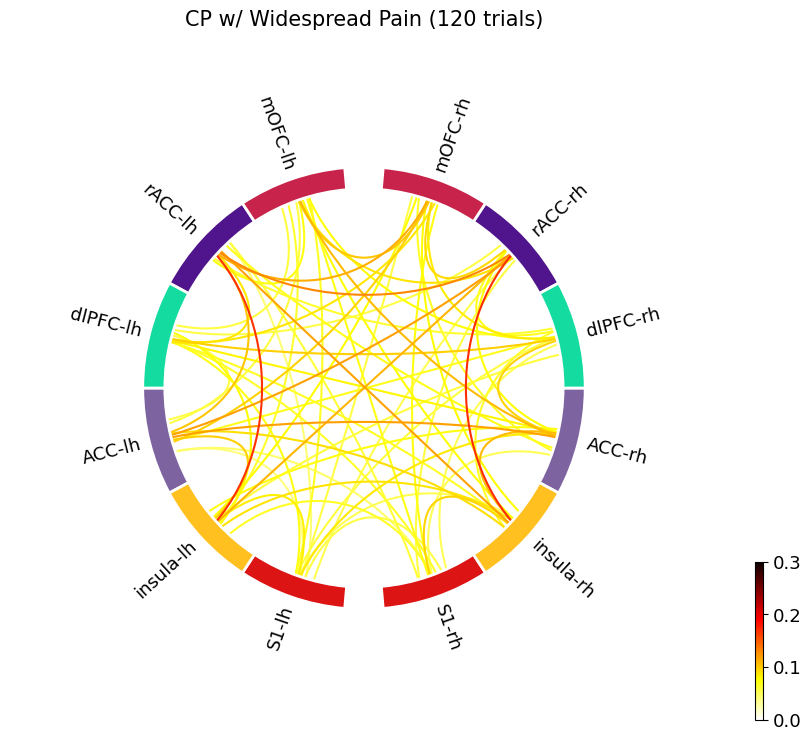

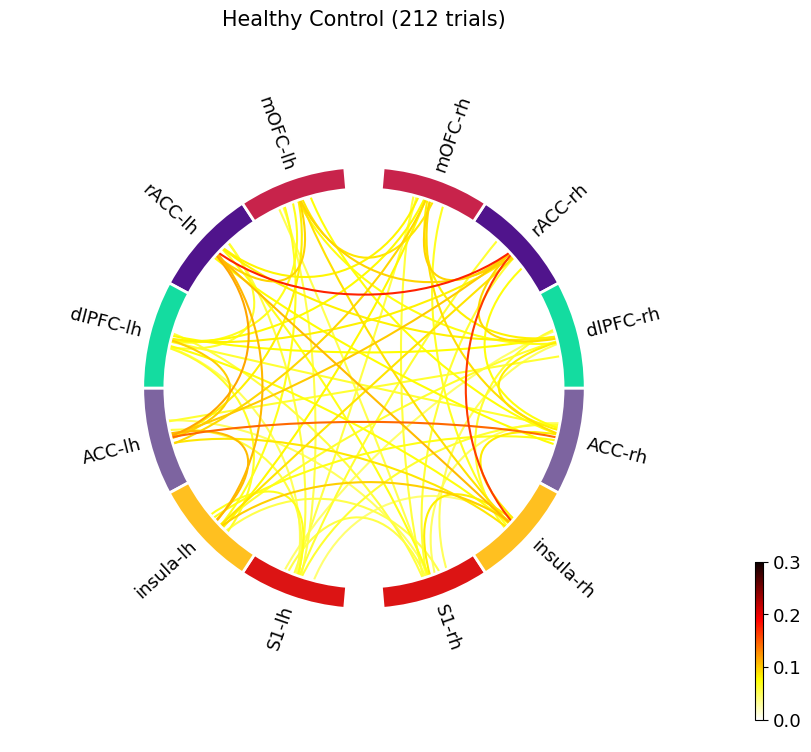

In [15]:
# CP Widespread Pain Hand HS. vs Healthy Control Hand HS
these_group_names = ["CP w/ Widespread Pain", "Healthy Control","Mann_Whitney_U_test"]
these_group_cons = [group_con_CP_WSP, group_con_HC]

for condition in conditions:
    # Make a directory for the stats
    stats_save_path = save_path / f"CP_WSP_vs_HC_{condition}"
    os.makedirs(stats_save_path, exist_ok=True)

    for method in con_methods:
        for band in band_names:
            # Select groups for mann-whitney
            print(f"{condition} - {these_group_names[0]} vs. {these_group_names[1]} - {method} - {band}")
            group1_stack = these_group_cons[0][condition][method][band]
            group2_stack = these_group_cons[1][condition][method][band]

            nepochs_1 = these_group_cons[0][condition]['num_epochs']
            nepochs_2 = these_group_cons[1][condition]['num_epochs']
            print(f"Num epochs: {nepochs_1} vs. {nepochs_2}")

            # Compute the Mann-Whitney U test
            p_values, means_1, sem_1, means_2, sem_2 = fc.mann_whitney_test(
                group1_stack, group2_stack,roi_names,method=method)

            # Plotting            
            # Gather the information for plotting
            plot_kwargs= dict(
                method=method,
                band=band, 
                roi_names=roi_names,
                roi_acronyms=roi_acronyms,
                condition=condition,
                group_names=these_group_names,
                nepochs=[nepochs_1, nepochs_2],
                titles=[these_group_names[0], 
                        these_group_names[1],
                        "CP with WSP vs. HC",],
                save_names=["Mann_Whitney_U_test",
                            these_group_names[0], 
                            these_group_names[1],
                            ],
                save_path=stats_save_path,
                )           

            fc.plot_connectivity_and_stats(means_1,
                                           means_2,
                                           sem_1,
                                           sem_2,
                                           p_values,
                                           **plot_kwargs,
                                           save_fig=True,
                                           highlight_pvals=highlight_pvals,
                                           min_fc_val=min_fc_val,
                                           set_title=set_title,
                                           show_fc_vals=show_fc_vals,
                                           round_neg_vals=round_neg_vals,
            )
            
            if "aec" in method and plot_brain:
                # Convert ROI names to labels
                labels = [
                    mne.read_labels_from_annot(
                        subject, regexp=roi, subjects_dir=subjects_dir
                    )[0]
                    for roi in roi_names
                ]

                # Load the inverse1
                inv = None
                if "Eyes" not in condition:
                    inv = utils.unpickle_data(
                        zscored_epochs_data_path, f"{sub_id}_inv.pkl"
                    )
                elif condition == "Eyes Open":
                    inv = utils.unpickle_data(
                        EO_resting_data_path, f"{sub_id}_inv.pkl"
                    )
                elif condition == "Eyes Closed":
                    inv = utils.unpickle_data(
                        EC_resting_data_path, f"{sub_id}_inv.pkl"
                    )

                fc.plot_degree(
                    p_values, 
                    title=f"{plot_kwargs['titles'][0]} | {condition} | {band} | ({method} method, {nepochs_1} vs. {nepochs_2} trials)",
                    labels=labels, 
                    inv=inv,
                )
                fc.plot_degree(
                    means_1, 
                    title=f"{plot_kwargs['titles'][1]} | {condition} | {band} | ({method} method, {nepochs_1} trials)",
                    labels=labels, 
                    inv=inv,
                )
                fc.plot_degree(
                    means_2, 
                    title=f"{plot_kwargs['titles'][2]} | {condition} | {band} | ({method} method, {nepochs_2} trials)",
                    labels=labels, 
                    inv=inv,
                )

In [16]:
# CP Widespread Pain Hand HS. vs CP without Widespread Pain
these_group_names = ["CP w/ Widespread Pain", "CP with Localized Pain","Mann_Whitney_U_test"]
these_group_cons = [group_con_CP_WSP, group_con_CP_No_WSP]

for condition in conditions:
    # Make a directory for the stats
    stats_save_path = save_path / f"CP_WSP_vs_CP_No_WSP_{condition}"
    os.makedirs(stats_save_path, exist_ok=True)

    for method in con_methods:
        for band in band_names:
            # Select groups for mann-whitney
            print(f"{condition} - {these_group_names[0]} vs. {these_group_names[1]} - {method} - {band}")
            group1_stack = these_group_cons[0][condition][method][band]
            group2_stack = these_group_cons[1][condition][method][band]

            nepochs_1 = these_group_cons[0][condition]['num_epochs']
            nepochs_2 = these_group_cons[1][condition]['num_epochs']
            print(f"Num epochs: {nepochs_1} vs. {nepochs_2}")
            
            # Compute the Mann-Whitney U test
            p_values, means_1, sem_1, means_2, sem_2 = fc.mann_whitney_test(
                group1_stack, group2_stack,roi_names,method=method)

            # Plotting            
            # Gather the information for plotting
            plot_kwargs= dict(
                method=method,
                band=band, 
                roi_names=roi_names,
                roi_acronyms=roi_acronyms,
                condition=condition,
                group_names=these_group_names,
                nepochs=[nepochs_1, nepochs_2],
                titles=[these_group_names[0], 
                        these_group_names[1],
                        "CP w/ WSP vs. CP w/o WSP",],
                save_names=["Mann_Whitney_U_test",
                            these_group_names[0], 
                            these_group_names[1],
                            ],
                save_path=stats_save_path,
                )
                                
            fc.plot_connectivity_and_stats(means_1,
                                           means_2,
                                           sem_1,
                                           sem_2,
                                           p_values,
                                           **plot_kwargs,
                                           vmin=vmin,
                                           vmax=vmax,
                                           save_fig=True,
                                           highlight_pvals=highlight_pvals,
                                           min_fc_val=min_fc_val,
                                           set_title=set_title,
                                           show_fc_vals=show_fc_vals,
                                           round_neg_vals=round_neg_vals,
            )

            if "aec" in method and plot_brain:
                # Convert ROI names to labels
                labels = [
                    mne.read_labels_from_annot(
                        subject, regexp=roi, subjects_dir=subjects_dir
                    )[0]
                    for roi in roi_names
                ]

                # Load the inverse
                inv = None
                if "Eyes" not in condition:
                    inv = utils.unpickle_data(
                        zscored_epochs_data_path, f"{sub_id}_inv.pkl"
                    )
                elif condition == "Eyes Open":
                    inv = utils.unpickle_data(
                        EO_resting_data_path, f"{sub_id}_inv.pkl"
                    )
                elif condition == "Eyes Closed":
                    inv = utils.unpickle_data(
                        EC_resting_data_path, f"{sub_id}_inv.pkl"
                    )

                fc.plot_degree(
                    p_values, 
                    title=f"{plot_kwargs['titles'][0]} | {condition} | {band} | ({method} method, {nepochs_1} vs. {nepochs_2} trials)",
                    labels=labels, 
                    inv=inv,
                )
                fc.plot_degree(
                    means_1, 
                    title=f"{plot_kwargs['titles'][1]} | {condition} | {band} | ({method} method, {nepochs_1} trials)",
                    labels=labels, 
                    inv=inv,
                )
                fc.plot_degree(
                    means_2, 
                    title=f"{plot_kwargs['titles'][2]} | {condition} | {band} | ({method} method, {nepochs_2} trials)",
                    labels=labels, 
                    inv=inv,
                )

Hand 256 mN - CP w/ Widespread Pain vs. CP with Localized Pain - wpli2_debiased - theta
Num epochs: 120 vs. 228


NameError: name 'vmin' is not defined

## Plot individual data in each group

### Plot settings

In [ ]:
# TODO: temporary
sub_ids_CP_WSP = ['018']

In [ ]:
# CLBP with WSP
sub_con_CP_WSP = {}
for sub_id in sub_ids_CP_WSP:
    print(sub_id)
    sub_avg_cons = fc.compute_sub_avg_con(
        sub_id,
        "Chronic Pain w/ WSP",
        processed_data_path,
        zscored_epochs_data_path,
        EO_resting_data_path,
        EC_resting_data_path,
        con_methods,
        conditions,
        condition_dict,
        roi_names,
        Freq_Bands,
        tmin,
        tmax,
        sfreq,
        include_LS=include_LS,
    )
    sub_con_CP_WSP[sub_id] = sub_avg_cons
    
utils.clear_display()

In [ ]:
# CP Widespread Pain
this_group_names = ["CP w/ Widespread Pain"]
this_group_cons = sub_con_CP_WSP
n=len(roi_names)

for condition in conditions:
    # Make a directory for the stats
    stats_save_path = save_path / f"CP_WSP_individual_{condition}"
    os.makedirs(stats_save_path, exist_ok=True)
    for sub_id in sub_ids_CP_WSP:
        for method in con_methods:
            for band in band_names:
                # Select groups for mann-whitney
                print(f"{condition} - {sub_id} - {this_group_names} - {method} - {band}")
                group1_stack = this_group_cons[sub_id][condition][method][band]
                nepochs_1 = this_group_cons[sub_id][condition]['num_epochs']
                print(f"Num epochs: {nepochs_1}")

                # Plotting
                # Gather the information for plotting
                plot_kwargs= dict(
                    method=method,
                    band=band, 
                    roi_names=roi_names,
                    roi_acronyms=roi_acronyms,
                    condition=condition,
                    group_names=this_group_names,
                    nepochs=[
                        nepochs_1, 
                        nepochs_1
                        ],
                    titles=[
                        this_group_names[0],
                        this_group_names[0],
                        "Correlation",
                        ],
                    save_names=[this_group_names],
                    save_path=stats_save_path,
                    )
                
                # TODO: temporary vmin and vmax
                vmin, vmax = (None, None)
                if vmin is None or vmax is None: # if not already set
                    if "wpli" in method: #dwPLI
                        vzero = 0.0
                        vtolerance = 0.2
                        vmin, vmax = (
                            (vzero, vzero + vtolerance) 
                            )
                    elif method == "dpli":
                        vzero = 0.5
                        vtolerance = 0.2
                        vmin, vmax = (
                            (vzero - vtolerance, vzero + vtolerance)
                            )
                    elif "aec" in method:
                        vzero = 0.0
                        vtolerance = 0.3 # TODO: confirm
                        vmin, vmax = (
                            (vzero, vzero + vtolerance)
                            )    
                        
                fc.plot_connectivity_and_stats(
                    means_1=group1_stack,
                    means_2=group1_stack,
                    sem_1=np.zeros((n, n)),
                    sem_2=np.zeros((n, n)),
                    p_values=group1_stack,
                    **plot_kwargs,
                    vmin=vmin,
                    vmax=vmax,
                    save_fig=True,
                    highlight_pvals=highlight_pvals,
                    show_only_significant=show_only_significant,
                    min_fc_val=min_fc_val,
                    set_title=set_title,
                    show_fc_vals=show_fc_vals,
                    round_neg_vals=round_neg_vals,
                )

                if "aec" in method and plot_brain:
                    # Convert ROI names to labels
                    labels = [
                        mne.read_labels_from_annot(
                            subject, regexp=roi, subjects_dir=subjects_dir
                        )[0]
                        for roi in roi_names
                    ]

                    # Load the inverse
                    inv = None
                    if "Eyes" not in condition:
                        inv = utils.unpickle_data(zscored_epochs_data_path,
                                                  f"{sub_id}_inv.pkl"
                        )
                    elif condition == "Eyes Open":
                        inv = utils.unpickle_data(EO_resting_data_path,
                                                  f"{sub_id}_inv.pkl"
                        )
                    elif condition == "Eyes Closed":
                        inv = utils.unpickle_data(EC_resting_data_path,
                                                  f"{sub_id}_inv.pkl"
                        )

                    fc.plot_degree(
                        p_values, 
                        title=f"{plot_kwargs['titles'][0]} | {condition} | {band} | ({method} method, {nepochs_1} vs. {nepochs_2} trials)",
                        labels=labels, 
                        inv=inv,
                    )
                    fc.plot_degree(
                        means_1, 
                        title=f"{plot_kwargs['titles'][1]} | {condition} | {band} | ({method} method, {nepochs_1} trials)",
                        labels=labels, 
                        inv=inv,
                    )
                    fc.plot_degree(
                        means_2, 
                        title=f"{plot_kwargs['titles'][2]} | {condition} | {band} | ({method} method, {nepochs_2} trials)",
                        labels=labels, 
                        inv=inv,
                    )